### Q1.How many patients were registered in each unique occupation?


In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline


Hospitalization_Discharge=pd.read_excel("Cardiac_Outcomes.xlsx",sheet_name=0)
CardiacComplications=pd.read_excel("Cardiac_Outcomes.xlsx",sheet_name=1)
Responsivenes=pd.read_excel("Cardiac_Outcomes.xlsx",sheet_name=2)
PatientHistory=pd.read_excel("Cardiac_Outcomes.xlsx",sheet_name=3)
Labs=pd.read_excel("Cardiac_Outcomes.xlsx",sheet_name=4)
Demography=pd.read_excel("Cardiac_Outcomes.xlsx",sheet_name=5)
Patient_Prescriptions=pd.read_excel("Cardiac_Outcomes.xlsx",sheet_name=6)

In [11]:
# Reading the Demography sheet of an excel file

count = Demography.occupation.value_counts(dropna=False)
count


occupation
UrbanResident    1670
farmer            198
Others             89
NaN                27
worker             17
Officer             7
Name: count, dtype: int64

### Q2.Divide GCS scores into slabs of 5 and count the number of patients under each band of score. Show this as any graph of your choice

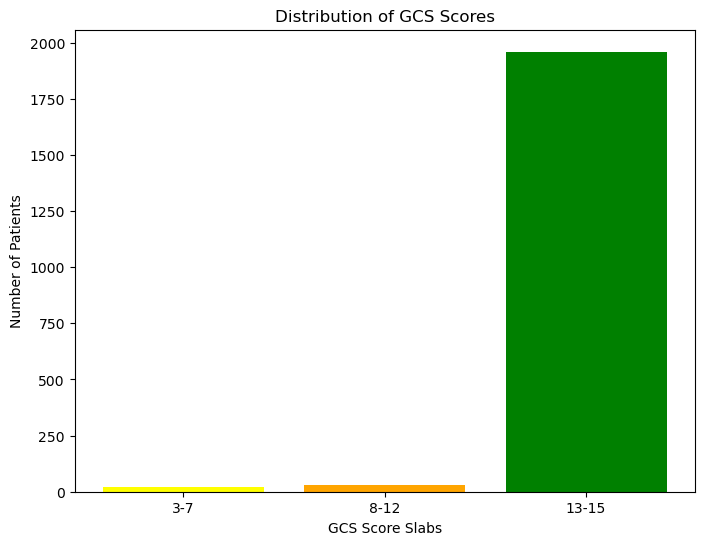

In [12]:
# subsetting the data using position
severe=(Responsivenes.loc[Responsivenes['GCS'].isin([3,4,5,6,7])])
severe
severe_count = len(severe)
severe_count

moderate=(Responsivenes.loc[Responsivenes['GCS'].isin([8,9,10,11,12])])
moderate
moderate_count = len(moderate)
moderate_count

mild=(Responsivenes.loc[Responsivenes['GCS'].isin([13,14,15])])
mild_count = len(mild)
mild_count

gcs_list = ['3-7', '8-12', '13-15']
gcs_count = [severe_count,moderate_count,mild_count]

plt.figure(figsize=(8, 6))
plt.bar(gcs_list, gcs_count, color=['yellow', 'orange', 'green'])
plt.title('Distribution of GCS Scores')
plt.xlabel('GCS Score Slabs')
plt.ylabel('Number of Patients')
plt.show()

### Q3.Add a calculated column called Discharge date into the Hospitalization_Discharge using the information already available to you

In [14]:
#Initialising a temporary variable

temp = Hospitalization_Discharge['dischargeDay'].apply(np.ceil).apply(lambda x: pd.Timedelta(x, unit='D'))
temp

# Creating the new column Discharge date 

Hospitalization_Discharge['Discharge_date'] = Hospitalization_Discharge['Admission_date'] + temp
Hospitalization_Discharge

inpatient_number DestinationDischarge admission_ward admission_way  \
0               857781                 Home     Cardiology  NonEmergency   
1               743087                 Home     Cardiology  NonEmergency   
2               866418                 Home     Cardiology  NonEmergency   
3               775928                 Home     Cardiology     Emergency   
4               810128                 Home     Cardiology  NonEmergency   
...                ...                  ...            ...           ...   
2003            740689   HealthcareFacility    GeneralWard     Emergency   
2004            734280   HealthcareFacility    GeneralWard     Emergency   
2005            781004   HealthcareFacility     Cardiology     Emergency   
2006            744870              Unknown     Cardiology  NonEmergency   
2007            791864                 Home     Cardiology     Emergency   

     discharge_department  visit_times respiratory_support oxygen_inhalation  \
0              Cardiology            1                 NaN     OxygenTherapy   
1              Cardiology            1                 NaN     OxygenTherapy   
2              Cardiology            2                 NaN     OxygenTherapy   
3              Cardiology            1                 NaN     OxygenTherapy   
4              Cardiology            1                 NaN     OxygenTherapy   
...                   ...          ...                 ...               ...   
2003          GeneralWard            1                 NaN     OxygenTherapy   
2004          GeneralWard            1                 NaN     OxygenTherapy   
2005           Cardiology            1                 NaN     OxygenTherapy   
2006           Cardiology            1                 IMV     OxygenTherapy   
2007           Cardiology            1                 NaN     OxygenTherapy   

      dischargeDay Admission_date  ... re_admission_within_28_days  \
0               11     2017-01-24  ...                           0   
1                8     2017-05-05  ...                           0   
2                5     2016-11-18  ...                           0   
3               11     2017-10-02  ...                           1   
4                5     2019-11-17  ...                           0   
...            ...            ...  ...                         ...   
2003             5     2016-02-07  ...                           0   
2004             8     2017-03-29  ...                           0   
2005            14     2018-01-22  ...                           0   
2006             1     2019-11-27  ...                           0   
2007             6     2017-02-17  ...                           0   

      death_within_3_months  re_admission_within_3_months  \
0                         0                             0   
1                         0                             0   
2                         0                             0   
3                         0                             1   
4                         0                             0   
...                     ...                           ...   
2003                      0                             0   
2004                      0                             0   
2005                      0                             1   
2006                      1                             0   
2007                      0                             0   

      death_within_6_months  re_admission_within_6_months  \
0                         0                             0   
1                         0                             0   
2                         0                             0   
3                         0                             1   
4                         0                             0   
...                     ...                           ...   
2003                      0                             0   
2004                      0                             0   
2005     

### Q4.What percentage of patients had Biventricular heart failure?

In [15]:
biventricular= CardiacComplications[CardiacComplications["type_of_heart_failure"] == "Both"]
both_count = len(biventricular)
both_count
total_count = len(CardiacComplications)
total_count
percentage = (both_count/total_count)*100

print('Percentage of patients having Biventricular heart failure:',percentage)


Percentage of patients having Biventricular heart failure: 73.70517928286853


### Q5.What is the ratio of patients who were responsive to pain vs responsive to sound?

In [16]:
#Intialising the variables

pain_responsive_count=0
sound_responsive_count=0

for i in Responsivenes['consciousness']:
    if(i=="ResponsiveToSound"):
          sound_responsive_count+=1
    elif i=="ResponsiveToPain":
          pain_responsive_count+=1
            
ratio=sound_responsive_count/pain_responsive_count
print("Pain Responsive Count: ",pain_responsive_count)
print("Sound Responsive Count: ",sound_responsive_count)
print("Ratio of patients responsive to pain vs responsive to sound:", ratio)


Pain Responsive Count:  4
Sound Responsive Count:  19
Ratio of patients responsive to pain vs responsive to sound: 4.75


### Q6.What was the average age group of the patients that had an outcome of 'Alive'?

In [19]:
def random_age(age):
    age_range = [int(age) for age in age.split('-')]
    return np.random.randint(age_range[0], age_range[1] + 1)

In [20]:
Alive_Cat_Patients=Hospitalization_Discharge[Hospitalization_Discharge['outcome_during_hospitalization']=="Alive"]
new_df = pd.merge(Alive_Cat_Patients,Demography,on='inpatient_number', how='inner')
Demography['new_age'] =new_df['ageCat'].apply(random_age)
average_age = new_df['new_age'].mean()
print(f"Average age of the patients: {average_age:.2f}")

Average age of the patients: 74.43


### Q7.Visualize missing data and missing patterns from Demography table using the "MissingNo" Library.

In [139]:
pip install missingno

In [151]:
import missingno as msno 

In [144]:
import seaborn as sns
import matplotlib.pyplot as plt
#no need to write plt.show everytime
%matplotlib inline 

In [ ]:
!pip install missingno
import missingno as msno

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2008 entries, 0 to 2007
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   inpatient_number  2008 non-null   int64  
 1   gender            2008 non-null   object 
 2   weight            2008 non-null   float64
 3   height            2008 non-null   float64
 4   BMI               2008 non-null   float64
 5   occupation        1981 non-null   object 
 6   ageCat            2008 non-null   object 
 7   BMI Category      2008 non-null   object 
dtypes: float64(3), int64(1), object(4)
memory usage: 125.6+ KB
None


C:\Users\laasya\anaconda3\Lib\site-packages\seaborn\matrix.py:260: FutureWarning:

Format strings passed to MaskedConstant are ignored, but in future may error or produce different behavior



ValueError: could not convert string to float: '--'

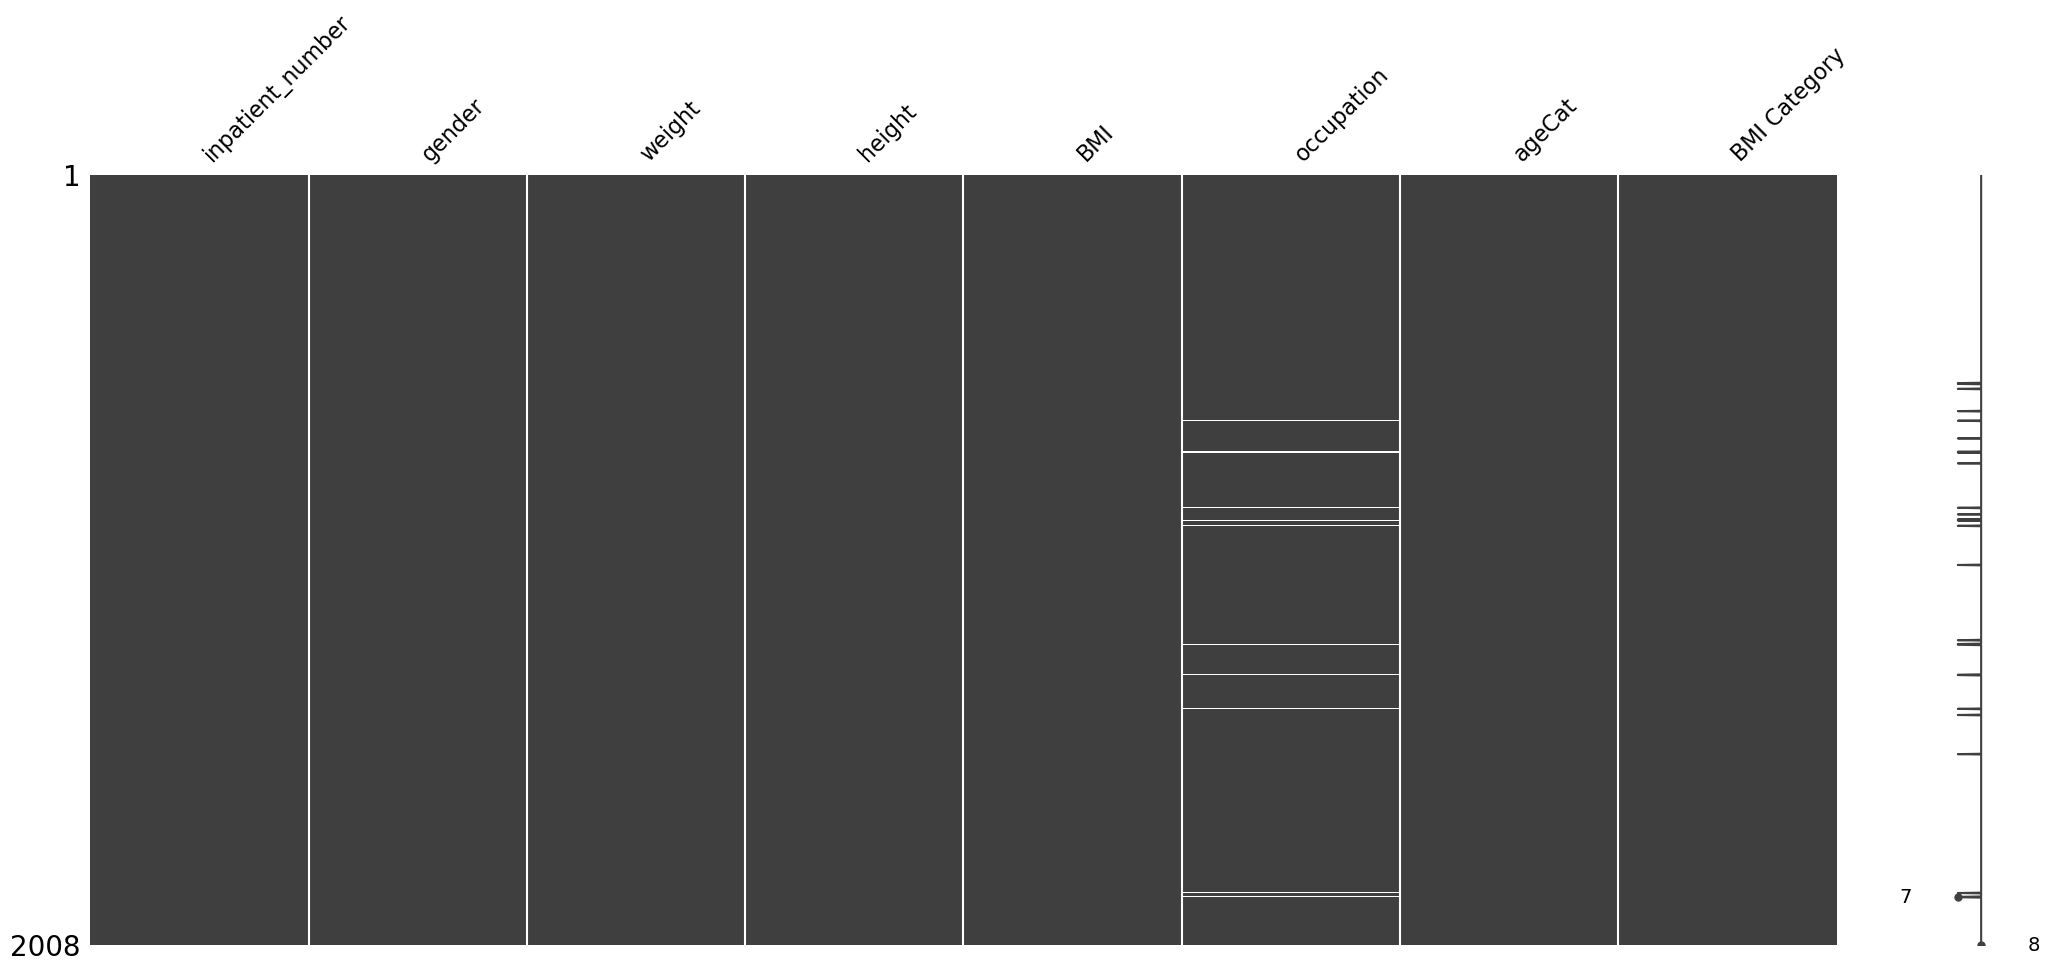

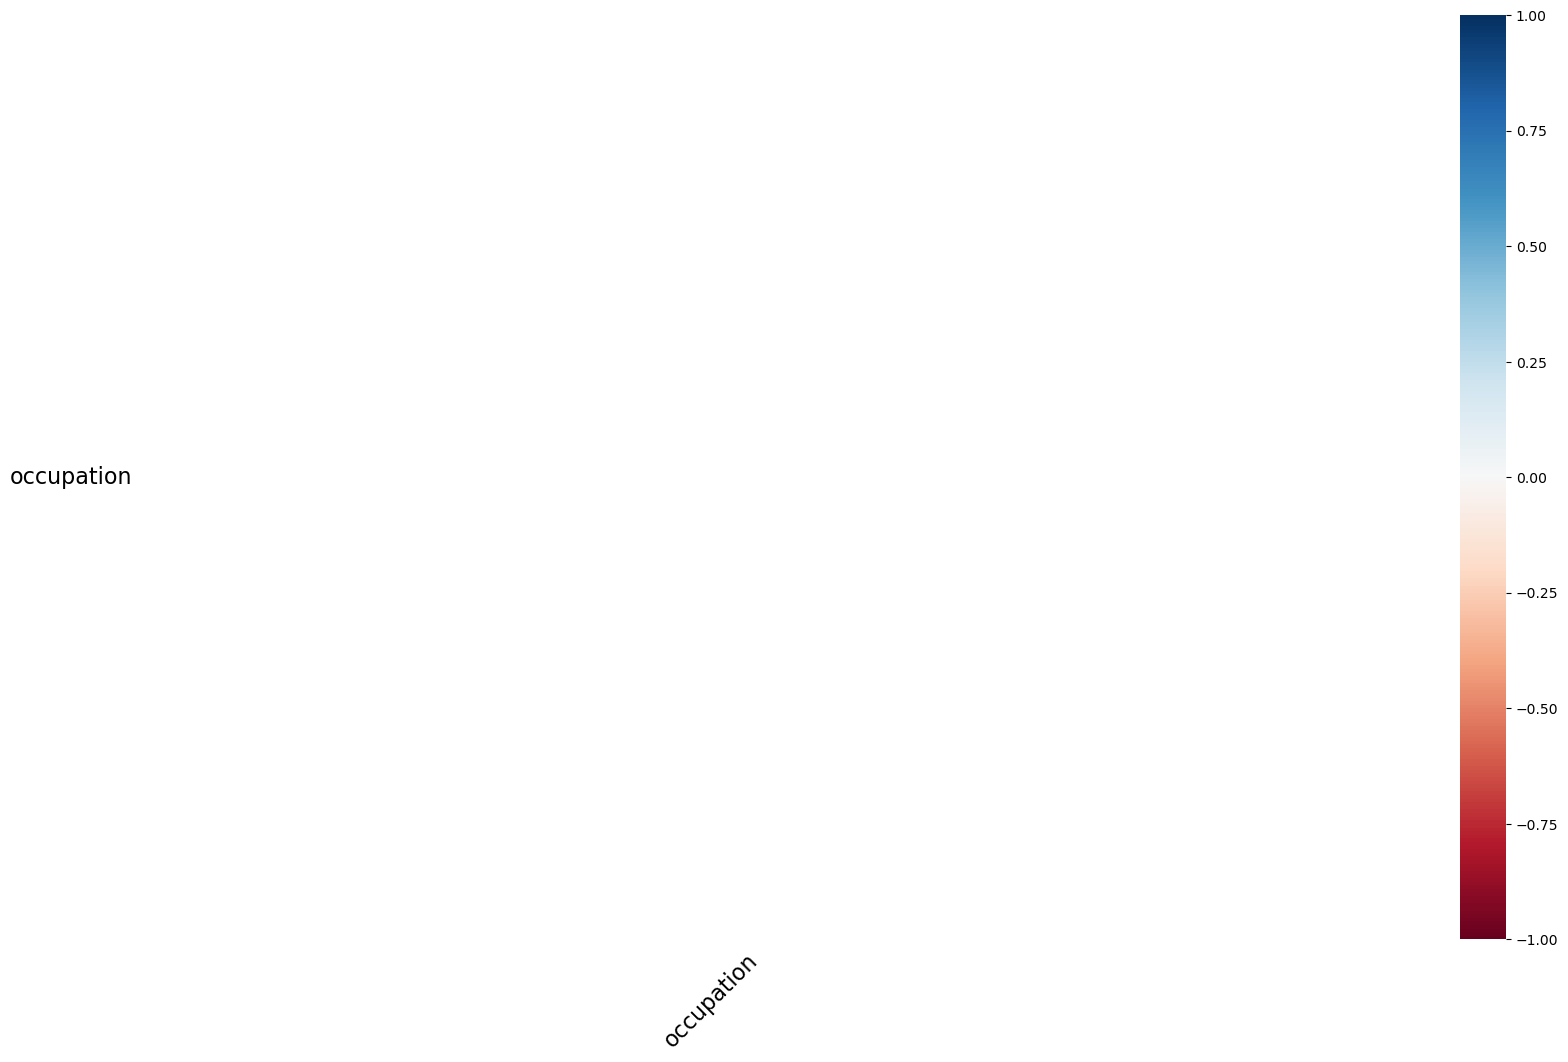

In [172]:
#Using missingno library to visualise the missing data
!pip install missingno
import missingno as msno
print(Demography.info())
msno.matrix(Demography,'Missing Data Matrix')
msno.heatmap(Demography,'Missing Data Heatmap')  #using heatmap to visualise the data
print(Demography.isnull().sum())

### Q8.Create a Waffle chart to show what percentage of total deaths belong to each admission_ward?


   ---------------------------------------- 0.0/25.6 MB ? eta -:--:--
   ---------------------------------------- 0.0/25.6 MB 991.0 kB/s eta 0:00:26
   ---------------------------------------- 0.2/25.6 MB 2.8 MB/s eta 0:00:10
    --------------------------------------- 0.6/25.6 MB 4.3 MB/s eta 0:00:06
   - -------------------------------------- 1.1/25.6 MB 7.1 MB/s eta 0:00:04
   --- ------------------------------------ 2.0/25.6 MB 9.6 MB/s eta 0:00:03
   ---- ----------------------------------- 2.6/25.6 MB 9.9 MB/s eta 0:00:03
   ------ --------------------------------- 4.1/25.6 MB 13.2 MB/s eta 0:00:02
   ------ --------------------------------- 4.4/25.6 MB 14.2 MB/s eta 0:00:02
   ---------- ----------------------------- 6.7/25.6 MB 16.4 MB/s eta 0:00:02
   ------------- -------------------------- 8.4/25.6 MB 18.4 MB/s eta 0:00:01
   -------------- ------------------------- 9.0/25.6 MB 18.1 MB/s eta 0:00:01
   --------------- ------------------------ 10.2/25.6 MB 19.2 MB/s eta 0:00:

C:\Users\laasya\AppData\Local\Temp\ipykernel_17912\796038169.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['total_death']= Hospitalization_Discharge['death_within_28_days']+Hospitalization_Discharge['death_within_3_months']+Hospitalization_Discharge['death_within_6_months']


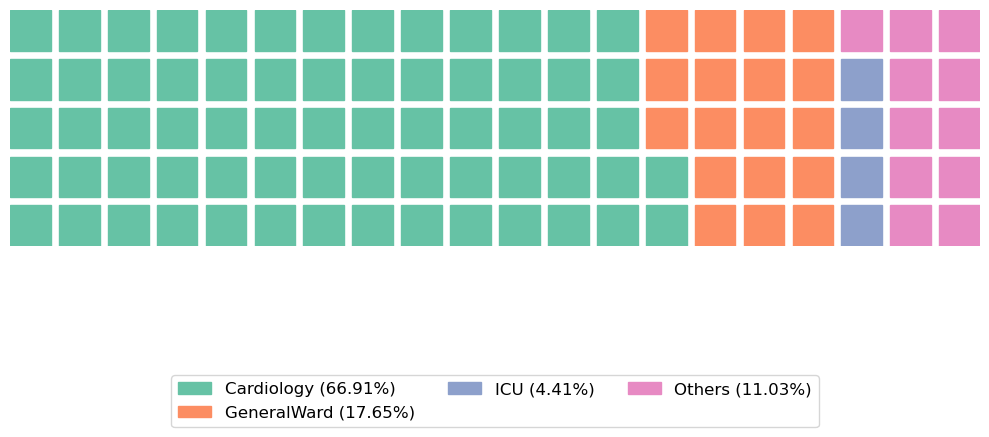

In [24]:
!pip install pywaffle matplotlib
from pywaffle import Waffle

#subsetting the data to required columns
df= Hospitalization_Discharge[['admission_ward','death_within_28_days','death_within_3_months','death_within_6_months']]
df.head()

#calculating total death by adding independent death columns
df['total_death']= Hospitalization_Discharge['death_within_28_days']+Hospitalization_Discharge['death_within_3_months']+Hospitalization_Discharge['death_within_6_months']
df.groupby (['admission_ward','total_death']).size()

#aggregating total death by admission_ward categories
df_group= df.groupby(['admission_ward']).agg('sum').reset_index()
df_group.drop(columns=['death_within_28_days','death_within_3_months','death_within_6_months'], axis=1, inplace=True)

df_group.head()

#calculating percentage of total death
df_group['percentage']=df_group['total_death'].apply(lambda x:(x/df_group['total_death'].sum())*100)
df_group['percentage']= round(df_group['percentage'],2)
df_group

#creating plot labels
plot_labels = [f'{i} ({str(j)}%)' for i,j in zip (df_group.admission_ward,df_group.percentage)]
plot_labels

# Creating a waffle chart
plt.figure(FigureClass=Waffle,figsize=(10,10),rows=5, columns =20,
           values= df_group['percentage'],
           labels=plot_labels,
           legend={'loc':'lower center','bbox_to_anchor':(0.5,-0.8),'ncol':3, 'fontsize':12})
plt.show()

### Q9.Create any 2 2-D arrays and perform matrix multiplication. Display the resulting array.

In [25]:
# Example of a program to multiply two matrices using list comprehension

# Consider a 3x3 matrix
A = [[12, 2, 10],
    [27, 8, 6],
    [16, 11, 1]]
 
# Conisder a 3x4 matrix
B = [[6, 3, 7, 0],
    [3, 3, 3, 5],
    [2, 3, 17, 13]]

# The result is a 3x4 matrix
result = [[sum(a1 * b1 for a1, b1 in zip(A_row, B_col)) 
                        for B_col in zip(*B)]
                                for A_row in A]
 
for i in result:
    print('The result is:',i)
 

The result is: [98, 72, 260, 140]
The result is: [198, 123, 315, 118]
The result is: [131, 84, 162, 68]


### Q10.Display the percentage of missing values in each column in the table labs. Show the distribution as a bar graph¶

<class 'pandas.core.series.Series'>


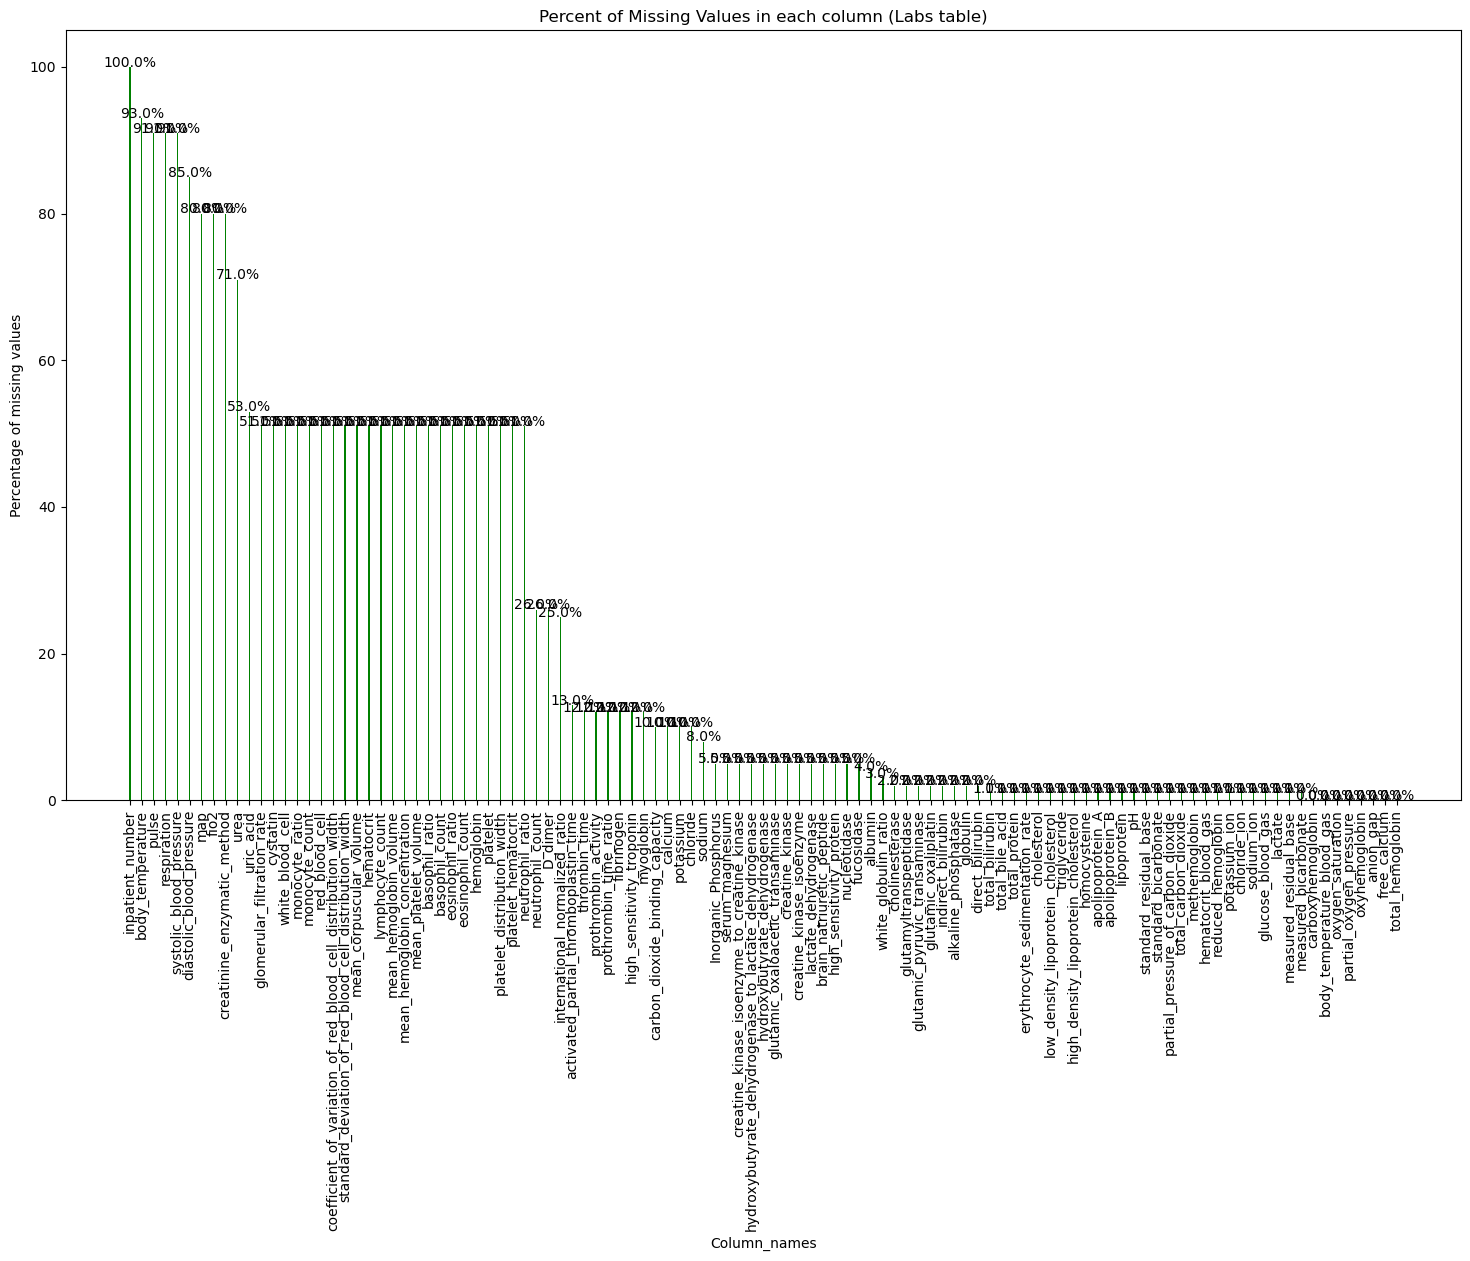

In [26]:
#Calculating the missing values of each column in Labs and converting to percentage
#Since the number of columns in the lab dataset are more than 100, the names of each column are getting overlapped

percent_missing_values = Labs.isnull().mean().round(2)* 100
print(type(percent_missing_values))

# Sorting the missing values in descending order
sorting_missing_values = percent_missing_values.sort_values(ascending=False)

#Defining the x and y lables for the bar graph
x= Labs.columns
y = sorting_missing_values
width = 0.1              # Keeping the width size to a min value to show all the columns clearly
fig, ax = plt.subplots(figsize=(18, 10))

plt.xlabel('Column_names')
plt.xticks(range(len(x)), x, rotation='vertical')   # Showing the column names vertically
plt.ylabel('Percentage of missing values')
plt.title('Percent of Missing Values in each column (Labs table)')
styling = ax.bar(x, y, width, align='center',color='green')

# For calculating the percentage for each column 
for i in styling:
    height = i.get_height()
    ax.text(x=i.get_x() + i.get_width() / 2, y=height+0.050,  #setting the height and width of each column
      s="{}%".format(height),
      ha='center')

plt.show()

### Q11.A valid mobile number is a ten digit number starting with a 7,8 or 9. For every string listed, print "YES" if it is a valid mobile number and "NO" if it is not on separate lines. Do not print the quotes.{2,9587456281,1252478965,7397260044}¶

In [27]:
str_list=['2','9587456281','1252478965','7397260044']
for s in str_list:
    if len(s)==10 and s[0] in ['7','8','9']:
         print("YES")
    else:
         print("NO")  

NO
YES
NO
YES


### Q12.If left ventricular end diastolic diameter has a normal range: 3.5 - 5.6 cm, how many patients fall outside that limit and what is the MAP of most patients with this condition?

In [28]:

normal_min = 3.5
normal_max = 5.6

patients_outside_normal_range=CardiacComplications.loc[(CardiacComplications['left_ventricular_end_diastolic_diameter_LV'] < normal_min) | (CardiacComplications['left_ventricular_end_diastolic_diameter_LV'] > normal_max)]
print('Number of patients outside the normal range :',patients_outside_normal_range.shape[0])
patients_outside_normal_range

#subset the data to the required columns
df_cardiac=patients_outside_normal_range[['inpatient_number','left_ventricular_end_diastolic_diameter_LV']]
df_cardiac.shape

#extract the required cols from Labs
df_labs= Labs[['inpatient_number','map']]
df_labs

#merge the two datasets on inpatient column
df_merge= pd.merge(df_cardiac,df_labs, on=['inpatient_number'], how='inner')
df_merge

#dropping ventricular column
df_merge.drop(columns=['left_ventricular_end_diastolic_diameter_LV'], axis=1, inplace=True)
df_merge.head()

#rounding map column
df_merge['map']=round(df_merge['map'],0)
df_merge

#map of most patients
map_count =df_merge['map'].value_counts().reset_index()
map_count

max(map_count['map'])

print(f'The Map of most patients with the left ventricular end diastolic diameter in the normal range is 97 with a maximum occurrence of {map_count["map"].iloc[0]}')




Number of patients outside the normal range : 1311
The Map of most patients with the left ventricular end diastolic diameter in the normal range is 97 with a maximum occurrence of 97.0


### Q13.Create a bar chart between lengthofstay and body temperature, classified as: Hypothermia, within range or hyperthermia

In [167]:
#Defining a function to classify temperature
def temperature_range(temp):
    if temp < 35.0:
        return 'Hypothermia'
    elif temp>35.0 and temp<=37.5:
        return 'Within the range'
    elif temp>37.5:
        return 'Hyperthermia'
    

In [168]:
#Creating a new column to store the different temperature ranges

Labs['classify_temperature'] = Labs['body_temperature'].apply(temperature_range)
Labs.tail()

inpatient_number  body_temperature  pulse  respiration  \
2003            740689              36.1    117           22   
2004            734280              36.3     70           21   
2005            781004              36.8    113           19   
2006            744870              36.4    134           19   
2007            791864              36.3    100           19   

      systolic_blood_pressure  diastolic_blood_pressure         map  fio2  \
2003                      120                        80   93.333333    33   
2004                      120                        86   97.333333    29   
2005                      135                       100  111.666667    33   
2006                       92                        72   78.666667    41   
2007                      142                        80  100.666667    33   

      creatinine_enzymatic_method   urea  ...  measured_bicarbonate  \
2003                        115.3   8.72  ...                   NaN   
2004                         63.1   5.96  ...                   NaN   
2005                         51.9   4.27  ...                   NaN   
2006                        191.1  35.87  ...                  18.8   
2007                        104.0   9.26  ...                   NaN   

      carboxyhemoglobin  body_temperature_blood_gas  oxygen_saturation  \
2003                NaN                         NaN                NaN   
2004                NaN                         NaN                NaN   
2005                NaN                         NaN                NaN   
2006                0.3                        37.0               96.0   
2007                NaN                         NaN                NaN   

      partial_oxygen_pressure  oxyhemoglobin  anion_gap  free_calcium  \
2003                      NaN            NaN        NaN           NaN   
2004                      NaN            NaN        NaN           NaN   
2005                      NaN            NaN        NaN           NaN   
2006                     84.0           95.6       21.8          0.94   
2007                      NaN            NaN        NaN           NaN   

      total_hemoglobin  classify_temperature  
2003               NaN      Within the range  
2004               NaN      Within the range  
2005               NaN      Within the range  
2006             139.0      Within the range  
2007               NaN      Within the range  

[5 rows x 108 columns]

Text(0.5, 1.0, 'Average Length of Stay by Body Temperature Classification')

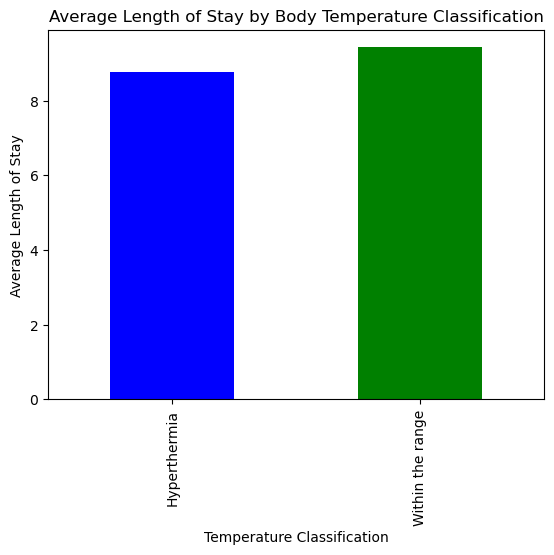

In [169]:
# merging Lab and Hospitalization_Discharge datasets
df_hosp =Hospitalization_Discharge.merge(Labs,on='inpatient_number')

# creating a new dataframe df_agpul with only he columns inpatient_number, pulse, ageCat
df_hosp = df_hosp.loc[:,['inpatient_number','classify_temperature','dischargeDay']]

#Calculating the length of stay
length_of_stay = df_hosp.groupby('classify_temperature')['dischargeDay'].mean()
length_of_stay
length_of_stay.plot(kind='bar', color=['blue', 'green', 'red'])
plt.xlabel('Temperature Classification')
plt.ylabel('Average Length of Stay')
plt.title('Average Length of Stay by Body Temperature Classification')


### Q14.Find the list of patients whose DischargeDay is greater than the value given by the user

In [33]:
num=int(input("Enter Any Number"))
Result=num<Hospitalization_Discharge['dischargeDay']
print(Hospitalization_Discharge.loc[Result,['inpatient_number','dischargeDay']])

Enter Any Number 45


      inpatient_number  dischargeDay
108             796520            50
183             775922            54
442             759764            54
470             811749            62
484             770068            62
579             782110            64
811             737251            57
884             794077           123
1063            722128            50
1228            795954            46
1345            744531            73
1511            836855            57
1513            757711            76
1548            791880            88
1573            794784            82
1613            768711           118
1860            749778            56
1908            857717            63


### Q15.Display a pie chart of number of patients in each category listed -death_within_28_days re_admission_within_28_days -death_within_3_months -re_admission_within_3_months -death_within_6_months -re_admission_within_6_months -return_to_emergency_department_within_6_months

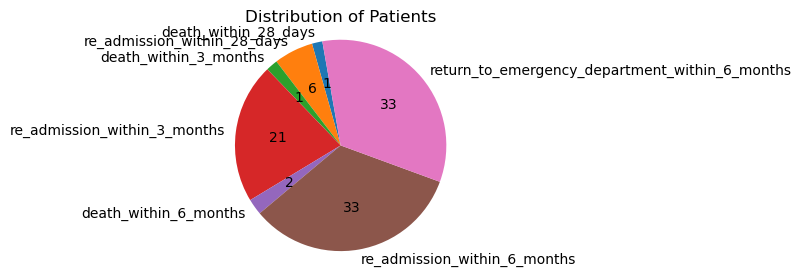

In [35]:
df_test=pd.read_excel("Cardiac_Outcomes.xlsx",sheet_name=0)
data_test=df_test[["death_within_28_days", "re_admission_within_28_days", "death_within_3_months","re_admission_within_3_months","death_within_6_months",
                   "re_admission_within_6_months","return_to_emergency_department_within_6_months"]]
data_test.groupby(["death_within_28_days", "re_admission_within_28_days", "death_within_3_months","re_admission_within_3_months","death_within_6_months",
                   "re_admission_within_6_months","return_to_emergency_department_within_6_months"])
#display(data_test)
plt.figure(figsize=(3, 3))

counts = data_test.sum()

# Convert counts to strings for labels
labels = [str(label) for label in counts.index]

plt.pie(counts, labels=labels, startangle=100, autopct='%d')
plt.title("Distribution of Patients")
plt.axis('equal')  
plt.show()

### Q16.Create a pivot table with myocardial_infarction, congestive_heart_failure,peripheral_vascular_disease as rows and average Uric Acid and BMI as columns, using melt functions

In [36]:
merge_df = pd.merge(CardiacComplications, Labs, on=['inpatient_number'])
merge_df = pd.merge(merge_df, Demography, on=['inpatient_number'])
pivot_df = pd.melt(merge_df, id_vars=['myocardial_infarction', 'congestive_heart_failure', 'peripheral_vascular_disease'],
                   value_vars=['uric_acid', 'BMI'], var_name='Metric', value_name='Value')

pivot_table = pivot_df.pivot_table(index=['myocardial_infarction', 'congestive_heart_failure', 'peripheral_vascular_disease'],
                                 columns='Metric',values='Value', aggfunc='mean')  
pivot_table

Metric                                                                            BMI  \
myocardial_infarction congestive_heart_failure peripheral_vascular_disease              
0                     0                        0                            21.688675   
                      1                        0                            21.761582   
                                               1                            22.724937   
1                     0                        0                            20.049487   
                      1                        0                            21.661325   
                                               1                            22.845834   

Metric                                                                       uric_acid  
myocardial_infarction congestive_heart_failure peripheral_vascular_disease              
0                     0                        0                            485.539683  
                      1                        0                            480.717178  
                                               1                            482.539326  
1                     0                        0                            565.900000  
                      1                        0                            499.558333  
                                               1                            549.300000

### Q17.Using arrays and loops find the number of patients who were Admitted in the month of November

In [37]:
count=0
for date in Hospitalization_Discharge['Admission_date']:
    #checking for tthe month
  if date.month == 11:
    count+=1
print("Number Of Patients Admitted in November:",count)

Number Of Patients Admitted in November: 195


### Q18. Create a heatmap on any columns of your choice including at least 1 lab value

<Axes: ylabel='ageCat'>

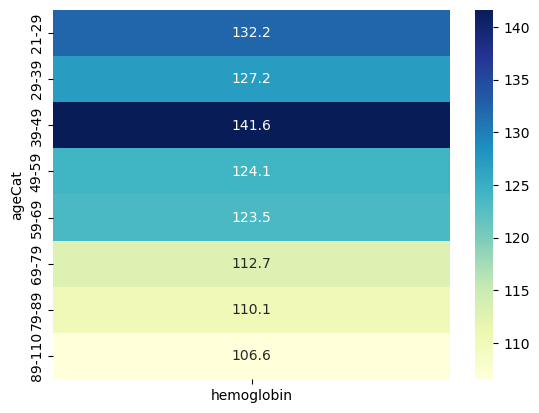

In [38]:
# importing seaborn library
import seaborn as sns
#import matplotlib.pyplot as plt
#%matplotlib inline 
import numpy as np

# merging labs and demography datasets
df7=Labs.merge(Demography,on='inpatient_number')

# creating a new dataframe df7 with only he columns gender, ageCat, hemoglobin
df7=df7.loc[:,['gender','ageCat','hemoglobin']]

#calculating the average hemoglobin values for each age group
hem_agecat= df7.groupby('ageCat').mean('hemoglobin')

# generating heat map for these age categories and their avg Hemoglobin values
sns.heatmap(hem_agecat, annot=True, cmap='YlGnBu', fmt='.1f')

### Q19.Create a bar chart by making list on Avg BMI and occupation column (with no duplicates) & make the hatchs onto the bar by using set_hatch() method

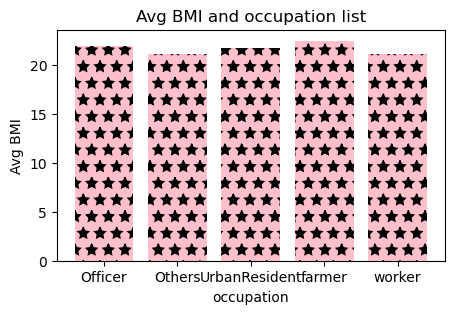

In [39]:
avg_bmi=Demography.groupby('occupation')['BMI'].mean()
plt.figure(figsize=(5,3))
barchart=plt.bar(avg_bmi.index,avg_bmi.values,color='pink')
# Adding hatch onto the bar
for x in barchart:
    x.set_hatch('*')
plt.title("Avg BMI and occupation list")
# labeling x-axis and y-axis
plt.xlabel("occupation")
plt.ylabel("Avg BMI")
plt.show()

### Q20.You are given three integers x,y,z representing the dimensions of a cuboid along with an integer n . Print a list of all possible coordinates given by(i,j,k) on a 3D grid where the sum of i,j,k is not equal to n.  x=1, y=1, z=2, n=3

In [40]:
x, y, z, n = 1, 1, 2, 3
print([(i, j, k) for i in range(x + 1) for j in range(y + 1)
  for k in range(z + 1) if i + j + k != n])

[(0, 0, 0), (0, 0, 1), (0, 0, 2), (0, 1, 0), (0, 1, 1), (1, 0, 0), (1, 0, 1), (1, 1, 0), (1, 1, 2)]


### Q21.Given the names and grades for each student in a class of students, store them in a nested list and print the name(s) of any student(s) having the second lowest grade.

In [41]:
def Sort(python_students):
    l = len(python_students)
    for i in range(0, l):
        for j in range(0, l-i-1):
            if (python_students[j][1] > python_students[j + 1][1]):
                temp = python_students[j]
                python_students[j] = python_students[j + 1]
                python_students[j + 1] = temp
    return python_students

# Input list
python_students = [['Harry', 37.21], ['Berry', 37.21], ['Tina', 37.2], ['Akriti', 41], ['Harsh', 39]]
sort_students=Sort(python_students)
# Printing the sorted list 
print(sort_students)
second_lowest_grade=sort_students[1][1]
print("Second Lowest Grade:",second_lowest_grade)
second_lowest_students = [student[0] for student in sort_students if student[1] == second_lowest_grade]
for name in second_lowest_students:
    print(name)

[['Tina', 37.2], ['Harry', 37.21], ['Berry', 37.21], ['Harsh', 39], ['Akriti', 41]]
Second Lowest Grade: 37.21
Harry
Berry


### Q22. Which patient was on the most number of prescribed drugs? What was his age and outcome?

In [42]:
max_count_value = Patient_Prescriptions['inpatient_number'].value_counts().idxmax()
print("Patient with maximum prescriptions is: ",max_count_value)
# Find age and outcome for the patient with the maximum count value
age = None
outcome = None

# Checking df5 for age range
if Demography[Demography['inpatient_number'] == max_count_value].shape[0] > 0:
    age =Demography[Demography['inpatient_number'] == max_count_value]['ageCat'].iloc[0]
# Checking df for outcome
if Hospitalization_Discharge[Hospitalization_Discharge['inpatient_number'] == max_count_value].shape[0] > 0:
    outcome = Hospitalization_Discharge[Hospitalization_Discharge['inpatient_number'] == max_count_value]['outcome_during_hospitalization'].iloc[0]

print("Age Range:", age)
print("Outcome:", outcome)

Patient with maximum prescriptions is:  777204
Age Range: 79-89
Outcome: Alive


### Q23.How many patients were prescribed Digoxin?

In [43]:
Patient_Prescriptions.head(2)
count=0
# checking for the Digoxin drug
for drug in Patient_Prescriptions['Drug_name']:
    if drug=="Digoxin tablet":
     count+=1
print("Number of Patients Prescribed Digoxin are :",count)

Number of Patients Prescribed Digoxin are : 999


### Q24.What columns indicate a prescence of anemia? Create a severity score for anemia and prove or disprove a correlation to Length of stay

0       15.8748
1       13.8196
2       17.4508
3       11.3908
4       14.5512
         ...   
2003    15.2728
2004    12.0148
2005    21.5632
2006    16.1144
2007    14.0648
Length: 2008, dtype: float64


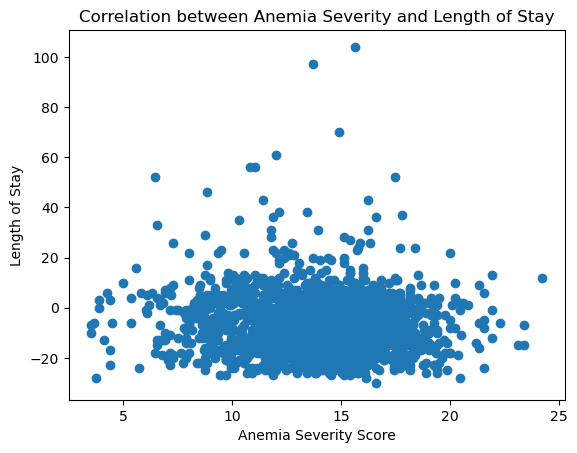

In [44]:
#Below are the columns responsible for causing anemia to cardiac patients.

df9 = pd.read_excel('Cardiac_Outcomes.xlsx',sheet_name=4)
df10 = pd.read_excel('Cardiac_Outcomes.xlsx',sheet_name=0)

# moderate_to_severe_chronic_kidney_disease = df9['moderate_to_severe_chronic_kidney_disease']
# congestive_heart_failure = df9['congestive_heart_failure']
hemoglobin = df9['hemoglobin']
hematocrit = df9['hematocrit']

# As per World Health Organization considering gender-independent cutoff 12 g/dL of hemoglobin per deciliter to 
# identify more patients as being anemic 
# Considering the normal average hematocrit percentage for men and women being 40%

weighted_score = ((df9['hemoglobin'] * 0.12) + (df9['hematocrit'] *.4))
print(weighted_score)

#  Creating a new column to display the severity score of anemia pateints
df9['Anemia_Severity_Score'] = weighted_score
df9['length_of_stay'] = df10['dischargeDay'] - df10['Admission_date'].dt.day
df9['length_of_stay']
plt.scatter(df9['Anemia_Severity_Score'], df9['length_of_stay'])
plt.xlabel('Anemia Severity Score')
plt.ylabel('Length of Stay')
plt.title('Correlation between Anemia Severity and Length of Stay')
plt.show()

### Q25. Using GCS score, how many patients are considered to be in a coma?

In [45]:
patient_coma_count=0
# checking for coma patients with GCS score
for i in Responsivenes['GCS']:
    if i<=8:
      patient_coma_count+=1
print("Number Of Patients In Coma Are: ",patient_coma_count)

Number Of Patients In Coma Are:  19


### Q26. Create a column that randomly generates an age between the age group given for each patient. What was the average age of the patients?

In [46]:
import numpy as np
def random_age(age):
    age_range = [int(age) for age in age.split('-')]
    # generating random age using randint()
    return np.random.randint(age_range[0], age_range[1] + 1)
Demography['new_age'] = Demography['ageCat'].apply(random_age)
# calculating average age for the new age column
average_age = Demography['new_age'].mean()
print(f"Average age of the patients: {average_age:.2f}")
Demography

Average age of the patients: 74.51


inpatient_number  gender  weight  height        BMI     occupation  \
0               857781    Male    50.0    1.64  18.590125  UrbanResident   
1               743087  Female    51.0    1.63  19.195303  UrbanResident   
2               866418    Male    70.0    1.70  24.221453         farmer   
3               775928    Male    65.0    1.70  22.491349  UrbanResident   
4               810128  Female    76.0    1.55  31.633715  UrbanResident   
...                ...     ...     ...     ...        ...            ...   
2003            740689  Female    35.0    1.50  15.555556         Others   
2004            734280  Female    50.0    1.55  20.811655  UrbanResident   
2005            781004    Male    75.0    1.70  25.951557  UrbanResident   
2006            744870    Male    40.0    1.50  17.777778  UrbanResident   
2007            791864  Female    45.0    1.55  18.730489  UrbanResident   

     ageCat  new_age  
0     69-79       72  
1     69-79       75  
2     59-69       67  
3     69-79       73  
4     69-79       69  
...     ...      ...  
2003  79-89       82  
2004  79-89       86  
2005  39-49       40  
2006  49-59       57  
2007  79-89       84  

[2008 rows x 8 columns]

### Q27.Using the age column generated in Q.26, calculate year of birth for each patient

In [47]:
import datetime
now = datetime.datetime.now()
#generating the current year
current_year = now.year
# finding the year of borned
Demography['year_of_birth']=current_year-Demography['new_age']
Demography

inpatient_number  gender  weight  height        BMI     occupation  \
0               857781    Male    50.0    1.64  18.590125  UrbanResident   
1               743087  Female    51.0    1.63  19.195303  UrbanResident   
2               866418    Male    70.0    1.70  24.221453         farmer   
3               775928    Male    65.0    1.70  22.491349  UrbanResident   
4               810128  Female    76.0    1.55  31.633715  UrbanResident   
...                ...     ...     ...     ...        ...            ...   
2003            740689  Female    35.0    1.50  15.555556         Others   
2004            734280  Female    50.0    1.55  20.811655  UrbanResident   
2005            781004    Male    75.0    1.70  25.951557  UrbanResident   
2006            744870    Male    40.0    1.50  17.777778  UrbanResident   
2007            791864  Female    45.0    1.55  18.730489  UrbanResident   

     ageCat  new_age  year_of_birth  
0     69-79       72           1952  
1     69-79       75           1949  
2     59-69       67           1957  
3     69-79       73           1951  
4     69-79       69           1955  
...     ...      ...            ...  
2003  79-89       82           1942  
2004  79-89       86           1938  
2005  39-49       40           1984  
2006  49-59       57           1967  
2007  79-89       84           1940  

[2008 rows x 9 columns]

### Q28.Store patient number and gender in a dictionary as a pair of values. Show the first 10 values

In [48]:
# Get the column info
Patient_Num= Demography['inpatient_number']
Gender = Demography['gender']
result = []
for i in range(len( Patient_Num)):
     #Adding to result based on indexes
     result.append(( Patient_Num[i], Gender[i]))
for j in range(min(10, len(result))):
 print(result[j])

(857781, 'Male')
(743087, 'Female')
(866418, 'Male')
(775928, 'Male')
(810128, 'Female')
(823318, 'Female')
(844094, 'Male')
(787530, 'Female')
(795420, 'Female')
(829801, 'Female')


### Q29.What percentage of those in a coma also have diabetes?

In [49]:
merge_data = Responsivenes.merge(PatientHistory)
# counting coma patients
coma_count = merge_data[merge_data['GCS'] <= 8].shape[0]
# counting patients with coma and diabetes
coma_diabetes_count = merge_data[(merge_data['diabetes'] == 1) & (merge_data['GCS'] <= 8)].shape[0]
print("coma_diabetes_count: ",coma_diabetes_count)
print("coma_count: ",coma_count)
#finding the percentage of those in coma also have diabetes
if coma_count > 0:
    result = (coma_diabetes_count / coma_count) * 100
    print(f"Percentage of patients in a coma who also have diabetes: {result:.2f}%")
else:
    print("No patients in a coma found in the dataset.")


coma_diabetes_count:  2
coma_count:  19
Percentage of patients in a coma who also have diabetes: 10.53%


### Q30. Identify any columns relating to echocardiography and create a severity score for cardiac function. Compare this outcome and show average severity score for each outcome

In [50]:
# Initialize LVEF_Score column
CardiacComplications['LVEF_Score'] = 0  

# Calculate LVEF_Score for each LVEF value
for i, LVEF in enumerate(CardiacComplications['LVEF']):
    if LVEF >= 55:
        CardiacComplications.at[i, 'LVEF_Score'] = 0
    elif 40 <= LVEF <= 54:
       CardiacComplications.at[i, 'LVEF_Score'] = 1
    elif 30 <= LVEF <= 39:
        CardiacComplications.at[i, 'LVEF_Score'] = 2
    else:
       CardiacComplications.at[i, 'LVEF_Score'] = 3

# Calculate Severity Score
CardiacComplications['Severity_Score'] = CardiacComplications['LVEF_Score'] +CardiacComplications['mitral_valve_EMS'] + CardiacComplications['mitral_valve_AMS'] + CardiacComplications['EA']
# assigning df column to df1
CardiacComplications['outcome_column_name'] = Hospitalization_Discharge['outcome_during_hospitalization']
# finding average scores for each outcome
average_scores = {}
for outcome in CardiacComplications['outcome_column_name'].unique():
    average_scores[outcome] = CardiacComplications[CardiacComplications['outcome_column_name'] == outcome]['Severity_Score'].mean()
# printing the averages for each outcome
print("Average Severity Score for Each Outcome:")
print(average_scores)

Average Severity Score for Each Outcome:
{'Alive': 5.311840871934605, 'Dead': 3.821333333333333, 'DischargeAgainstOrder': 3.6080454545454548}


### Q31.Group the days to re-admission into bins and count how many patients were in each bin

In [51]:
bin = [0, 50, 100, 150, 200,250,300,350,400,450,500]
# bin the readmission_time_days_from_admission column
bin_count = pd.cut(Hospitalization_Discharge['readmission_time_days_from_admission'], bin).value_counts()
print(bin_count)

readmission_time_days_from_admission
(0, 50]       274
(50, 100]     257
(100, 150]    128
(150, 200]     71
(200, 250]     58
(250, 300]     34
(350, 400]     22
(300, 350]     21
(450, 500]      8
(400, 450]      7
Name: count, dtype: int64


### Q32.Combine admission_ward & admission_way and count the patients under the new group. Create a pie chart and explode the biggest wedge

([<matplotlib.patches.Wedge at 0x222c58f1250>,
 [Text(0.269900580191181, 1.169253469874032, 'Cardiology NonEmergency'),
  Text(-0.8935461674585818, -0.6415413054668265, 'Cardiology Emergency'),
  Text(0.4619319887459488, -0.9983079874333436, 'GeneralWard Emergency'),
  Text(0.8803140870178159, -0.6595810095795583, 'Others NonEmergency'),
  Text(1.0354809225047192, -0.3711862862886717, 'GeneralWard NonEmergency'),
  Text(1.0891131681405644, -0.15437780599173848, 'Others Emergency'),
  Text(1.0996109524378002, -0.029253260994870897, 'ICU Emergency'),
  Text(1.099994615372118, -0.003441823985392837, 'ICU NonEmergency')],
 [Text(0.15744200511152223, 0.6820645240931853, '42.78%'),
  Text(-0.48738881861377187, -0.34993162116372356, '34.26%'),
  Text(0.2519629029523357, -0.5445316295090964, '9.71%'),
  Text(0.48017132019153586, -0.35977145977066816, '6.03%'),
  Text(0.564807775911665, -0.20246524706654817, '3.49%'),
  Text(0.5940617280766715, -0.0842060759954937, '2.99%'),
  Text(0.5997877922

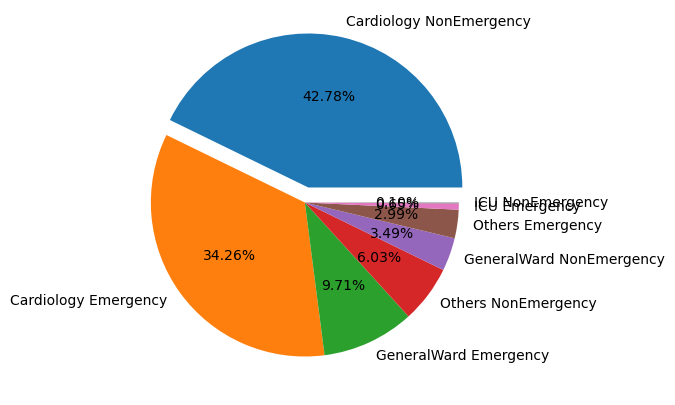

In [52]:
Hospitalization_Discharge['adm_ward_way']=Hospitalization_Discharge['admission_ward']+' '+Hospitalization_Discharge['admission_way']
adm_count=Hospitalization_Discharge['adm_ward_way'].value_counts()
plt.figure(figsize=(5,5))
explodes=[0.1 if count == adm_count.idxmax() else 0 for count in adm_count.index]
# creating pie chart with percentages 
plt.pie(adm_count,labels=adm_count.index,explode=explodes,autopct="%0.2f%%")

### Q33. Retrieve the row with minimum white_blood_cell count using sorting technique.

In [53]:
#sorting using sort_values method
Labs = Labs.sort_values('white_blood_cell')

#retriving the values from the first row after sorting, gives the minimum row value
Labs.head(1)

#retriving the first row(with minimum wbc count) using iloc - gets rows (and/or columns) at integer locations.
Labs.iloc[:1]

inpatient_number  body_temperature  pulse  respiration  \
865            746068              37.1     71           20   

     systolic_blood_pressure  diastolic_blood_pressure    map  fio2  \
865                      130                        88  102.0    21   

     creatinine_enzymatic_method  urea  ...  measured_bicarbonate  \
865                         88.8  7.26  ...                  21.6   

     carboxyhemoglobin  body_temperature_blood_gas  oxygen_saturation  \
865                0.3                        37.0               97.0   

     partial_oxygen_pressure  oxyhemoglobin  anion_gap  free_calcium  \
865                     95.0           96.3       16.8          1.11   

     total_hemoglobin  classify_temperature  
865              94.0      Within the range  

[1 rows x 108 columns]

### Q34.	get the last letter of discharge_department of patients using RegEX

In [54]:
#importing regular expression
import re

In [55]:
#intialising an empty list
last_letters = []

#looping discharge_department in for loop
for i in Hospitalization_Discharge['discharge_department']:

    # search() function Scan through a string, looking for any location where this RE matches
    match = re.search(r'([A-Za-z])$',i)

    # Extract and append the last letter to the list
    if match:
        last_letters.append(match.group(1))

#creating a new variable called last_letter and assigning from the list
Hospitalization_Discharge['last_letter'] = last_letters

#print last 20 rows from the dataframe final
final =Hospitalization_Discharge[['discharge_department','last_letter']]
final.tail(20)

discharge_department last_letter
1988           Cardiology           y
1989          GeneralWard           d
1990           Cardiology           y
1991           Cardiology           y
1992           Cardiology           y
1993           Cardiology           y
1994           Cardiology           y
1995           Cardiology           y
1996           Cardiology           y
1997           Cardiology           y
1998           Cardiology           y
1999               Others           s
2000           Cardiology           y
2001          GeneralWard           d
2002          GeneralWard           d
2003          GeneralWard           d
2004          GeneralWard           d
2005           Cardiology           y
2006           Cardiology           y
2007           Cardiology           y

### Q35. find the way to reverse string for given input (eg: input : This hackathon is about cardiac outcomes: outcomes cardiac about is hackathon This)

In [56]:
#fetch the string input
Strvalue=input("Enter Any String: ")

#split the string into words intializing empty list to get the reversed string
str1 = Strvalue.split()[::-1]
str2 = []

#using for loop to read the words 
for i in str1:
    # appending words from last to str2
    str2.append(i)
    
# printing reverse words
print(" ".join(str2))

Enter Any String:  xchgkjs dgdfg


dgdfg xchgkjs


### Q36.	Use the QB style library to create any multidimensional arrays.Create a figure object called fig using plt.figure() ** ** Use add_axes to add an axis to the figure canvas at [0,0,1,1]. Call this new axis ax. ** ** Plot (x,y) on that axes and set the labels.

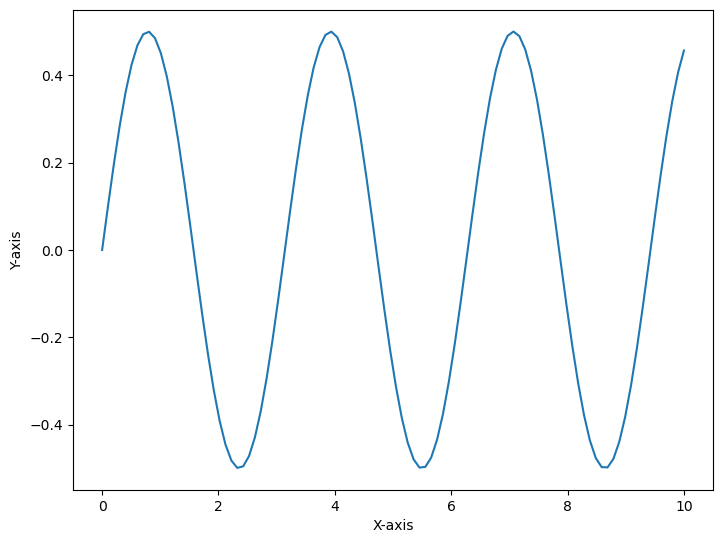

In [57]:
import matplotlib.pyplot as plt
x=np.linspace(0,10,100)
y=np.sin(x) * np.cos(x)

# creating figure object
fig=plt.figure()
ax_fig=fig.add_axes([0,0,1,1])
ax_fig.plot(x, y) 

# set labels for x-axis and y-axis
ax_fig.set_xlabel('X-axis')
ax_fig.set_ylabel('Y-axis') 
plt.show()   

### Q37. Using dischargeDay values print even if it even number and odd if it odd number


In [58]:
#intialising an empty list
number_type1 = []

#looping the dischargeDay values
for i in Hospitalization_Discharge['dischargeDay']:
    
 # checking even or odd
    if i%2 == 0:
      number_type1.append("even")
    else:
      number_type1.append("Odd")
        
#creating a new variable called number_type1 and assigning from the list
Hospitalization_Discharge['number_type'] = number_type1

#print first 20 rows from the dataframe final
final =Hospitalization_Discharge[['dischargeDay','number_type']]
final.head(20)

dischargeDay number_type
0             11         Odd
1              8        even
2              5         Odd
3             11         Odd
4              5         Odd
5              6        even
6             10        even
7             27         Odd
8             20        even
9              4        even
10             9         Odd
11             9         Odd
12            11         Odd
13            22        even
14             8        even
15             3         Odd
16            16        even
17            14        even
18             7         Odd
19            10        even

### Q38. find the length of Tuple for any given input (Hint: Input a string from user )

In [59]:
# getting the input
my_tuple = tuple(input('Enter space-separated words: ').split())

#printing the spiltted input string 
print(my_tuple)

#using len function, getting the length of the tuple 
length=len(my_tuple)

#printing the input tuple length(word count)
print("Tuple length is: ",length)

Enter space-separated words:  sdf fdgd


('sdf', 'fdgd')
Tuple length is:  2


### Q39. Create a subplot on x = np.arange(0, 10, 0.1) , y = np.sin(np.pi * x) + x with 2 rows & 2 columns with object oriented approach

In [60]:
pip install matplotlib

Note: you may need to restart the kernel to use updated packages.


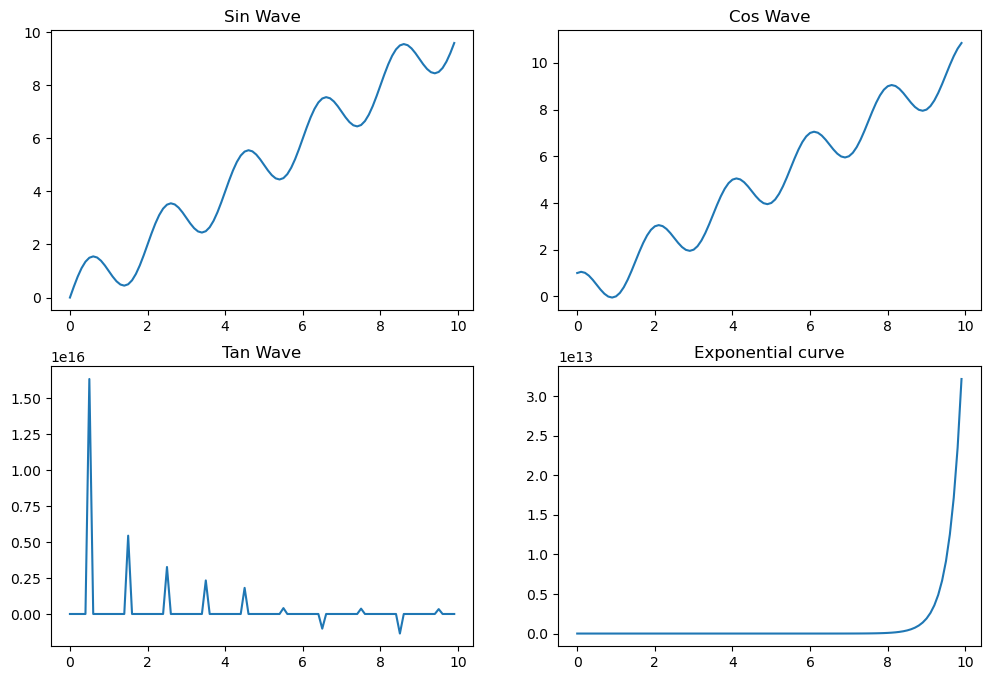

In [61]:
import numpy as np
import matplotlib.pyplot as plt
#no need to write plt.show everytime
%matplotlib inline 


#intialising x and y values
x = np.arange(0, 10, 0.1) 
y = np.sin(np.pi * x) + x 

#To create a 2*2 suplots
fig,axs = plt.subplots(2,2,figsize=(12,8))

#creating sin wave
axs[0,0].plot(x,y)
axs[0,0].set_title('Sin Wave')

#creating cos wave
y = np.cos(np.pi * x) + x 

axs[0,1].plot(x,y)
axs[0,1].set_title('Cos Wave')

#creating tan wave
y = np.tan(np.pi * x) + x 

axs[1,0].plot(x,y)
axs[1,0].set_title('Tan Wave')

#creating Exponential curve
y = np.exp(np.pi * x) + x 

axs[1,1].plot(x,y)
axs[1,1].set_title('Exponential curve');

### Q40. Select 25 different random values between 200 to 800.


In [62]:
import random

In [63]:
#setting the random values range from 200 to 800 and generating 25 random numbers 
Rand_values= random.sample(range(200,800),25)
print(Rand_values)

[265, 282, 622, 254, 201, 644, 451, 621, 597, 350, 708, 381, 610, 333, 769, 371, 584, 300, 228, 613, 416, 640, 576, 382, 764]


### Q41.	Plot the time series of Admission dates with count of patients. The X-Axis should be for every 5 months


In [64]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
#no need to write plt.show everytime
%matplotlib inline 


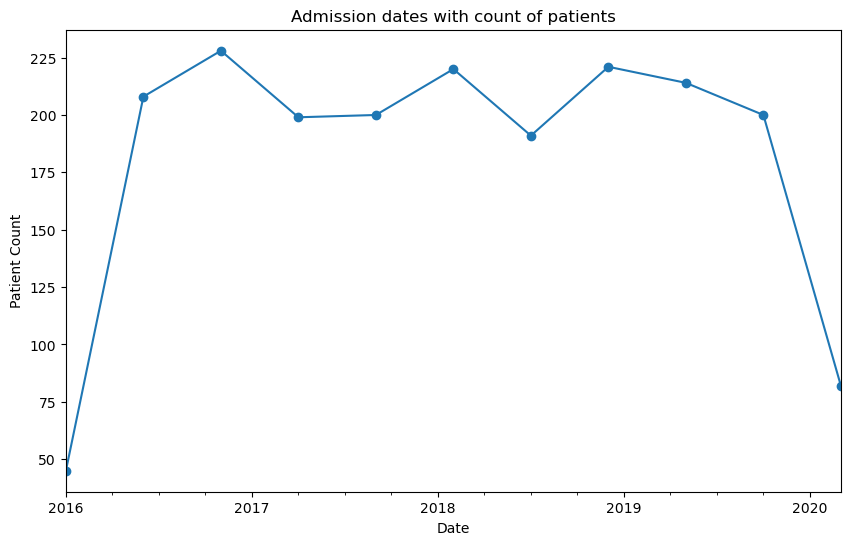

In [65]:
#use pd.Grouper to group Admission_date, with a frequency of 5 months and the calculates the size(patients count)

patient_count=Hospitalization_Discharge.groupby(pd.Grouper(key='Admission_date',freq='5M')).size()

# intializing fig size
plt.figure(figsize=(10,6))

#ploting 
patient_count.plot(marker='o',linestyle='-')
plt.title("Admission dates with count of patients")
plt.xlabel('Date')
plt.ylabel('Patient Count');


### Q42.	np.arange(1,21).reshape(4,5), find array slicing to get the elements 1,2,8,19.  When the value is less than 9, print as 0,else print 1


In [66]:
#creating an array 
array1=np.arange(1,21).reshape(4,5)
#print(array1)
slice_part=[1,2,8,19]

#slicing the 1,2,8,19th elements from the array using where
slice= np.isin(array1,slice_part)

#comparing and setting the values as 0 or 1 using where
gtr = np.where(array1 <= 8, 0, 1)

#using where resetting the derived values
result = np.where(slice, gtr, '_')

print(result)

[['0' '0' '_' '_' '_']
 ['_' '_' '0' '_' '_']
 ['_' '_' '_' '_' '_']
 ['_' '_' '_' '1' '_']]


### Q43. Give Distribution chart of max Killip_grade

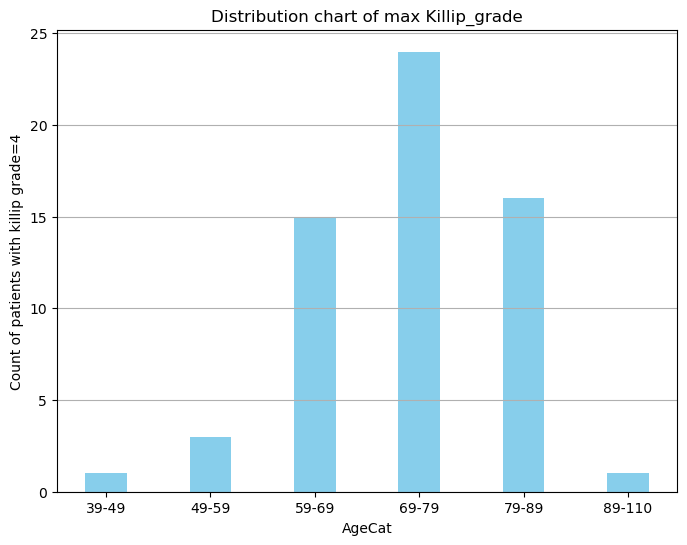

In [68]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
#no need to write plt.show everytime
%matplotlib inline 

# merging CardiacComplications and demography datasets
df_kill =CardiacComplications.merge(Demography,on='inpatient_number')

# creating a new dataframe df_agpul with only he columns inpatient_number, pulse, ageCat
df_kill = df_kill.loc[:,['inpatient_number','Killip_grade','ageCat']]

#getting only the rows with killip_grade=4, which is the max value
df_kill = df_kill.loc[df_kill['Killip_grade'] == 4,:]
df_kill.head()

#counting for each age categ and then sorting
df_kill_agecat= df_kill.ageCat.value_counts().reset_index()
df_kill_agecat = df_kill_agecat.sort_values('ageCat')
df_kill_agecat

#creating a bar graph between age categ and their killip counts
plt.figure(figsize=(8, 6))
bars1=plt.bar(df_kill_agecat['ageCat'], df_kill_agecat['count'], width=0.4, label='Value1', color='skyblue')
plt.title('Distribution chart of max Killip_grade')
plt.xlabel('AgeCat')
plt.ylabel('Count of patients with killip grade=4')
plt.grid(axis='y')


### Q44. Based on Q26 and 27 display all demographic details of patients who are born in year 1945


In [69]:
#filtering patients who born in year 1945
patients_1945_birth=Demography[Demography['year_of_birth']==1945]
patients_1945_birth

inpatient_number  gender  weight  height        BMI     occupation  \
7               787530  Female    50.0    1.55  20.811655  UrbanResident   
8               795420  Female    60.0    1.55  24.973985  UrbanResident   
30              743467  Female    33.0    1.45  15.695600  UrbanResident   
33              766383  Female    40.0    1.50  17.777778  UrbanResident   
40              760822  Female    43.0    1.48  19.631118  UrbanResident   
...                ...     ...     ...     ...        ...            ...   
1965            846828  Female    47.5    1.52  20.559211  UrbanResident   
1966            731581  Female    48.0    1.51  21.051708  UrbanResident   
1967            802524    Male    50.0    1.50  22.222222  UrbanResident   
1978            841113    Male    48.0    1.65  17.630854         farmer   
2002            754589  Female    52.5    1.53  22.427272  UrbanResident   

     ageCat  new_age  year_of_birth  
7     69-79       79           1945  
8     79-89       79           1945  
30    79-89       79           1945  
33    79-89       79           1945  
40    79-89       79           1945  
...     ...      ...            ...  
1965  69-79       79           1945  
1966  69-79       79           1945  
1967  69-79       79           1945  
1978  79-89       79           1945  
2002  69-79       79           1945  

[138 rows x 9 columns]

### Q45. Create a dataframe with date and time as columns, where the values are the admission time

In [71]:
#creating a dataframe using Admission_date variable from Hospitalization_Discharge
df_date = pd.DataFrame({'Adm_date_tm':Hospitalization_Discharge['Admission_date']})
df_date['date'] = df_date['Adm_date_tm'].dt.date
df_date['time'] = df_date['Adm_date_tm'].dt.time
df_date.head()


Adm_date_tm        date      time
0  2017-01-24  2017-01-24  00:00:00
1  2017-05-05  2017-05-05  00:00:00
2  2016-11-18  2016-11-18  00:00:00
3  2017-10-02  2017-10-02  00:00:00
4  2019-11-17  2019-11-17  00:00:00

### Q46. Convert occupation into numeric by Label encoding


In [73]:
#importing LabelEncoder class from scikit-learn
from sklearn.preprocessing import LabelEncoder

#Create an instance of LabelEncoder() and store it in labelencoder variable/object le
lbl_enc = LabelEncoder()

#Apply fit for the occupation column
Demography.occupation=lbl_enc.fit_transform(Demography.occupation)


distinct_occu = Demography.occupation.value_counts(dropna=False)
distinct_occu

occupation
2    1670
3     198
1      89
5      27
4      17
0       7
Name: count, dtype: int64

### Q47. Generate a 3x3 Array using Random values between 1to 9 and Fix the values and position in Next Run.


In [74]:
#Assuming to generate a random and fixed array
# Generate a 3x3 array with random values between 1 and 9
array1 = np.random.randint(1, 10, size=(3, 3))

# Manually set the values in the array
array2 = np.array([[1, 2, 3],
                      [4, 5, 6],
                      [7, 8, 9]])

# Print both the array
print("Random array:")
print(array1)

print("fixed array:")
print(array2)

Random array:
[[1 6 5]
 [4 3 1]
 [4 8 8]]
fixed array:
[[1 2 3]
 [4 5 6]
 [7 8 9]]


### Q48.	Using loops, create a multiplication table for the number 7


In [75]:
# using the for loop to generate the multiplication table for the number 7

print("Multiplication table for the number 7: ")  

for i in range(1,11):
    print(7,'X', i,'=',7*i)

Multiplication table for the number 7: 
7 X 1 = 7
7 X 2 = 14
7 X 3 = 21
7 X 4 = 28
7 X 5 = 35
7 X 6 = 42
7 X 7 = 49
7 X 8 = 56
7 X 9 = 63
7 X 10 = 70


### Q49. Connect to sql and write a query to find all patients who have a gender of 'Male' ( Attach screenshots for this question)

In [76]:
pip install psycopg2

Note: you may need to restart the kernel to use updated packages.


In [78]:
import psycopg2 as pg2
import sqlite3

In [79]:
conn = pg2.connect(database = "Cardiac_Outcomes", 
                       host = "localhost",
                       user = "postgres",
                       password = "sql123",
                       port = "5432")

In [80]:
cursor = conn.cursor()
cursor.execute("select inpatient_number from Demography where gender='Male'")

In [81]:
print(cursor.fetchall())

[(857781,), (866418,), (775928,), (844094,), (802296,), (744167,), (759947,), (729522,), (814869,), (764380,), (861240,), (848044,), (739615,), (837384,), (798240,), (857297,), (859976,), (763014,), (794078,), (793939,), (864678,), (796227,), (779834,), (821564,), (833497,), (746924,), (791627,), (775978,), (793425,), (817300,), (863747,), (773090,), (850730,), (777721,), (842939,), (797752,), (828763,), (866380,), (803171,), (796520,), (863085,), (822474,), (789207,), (853810,), (754799,), (799827,), (735827,), (757269,), (729949,), (730551,), (854856,), (860037,), (790695,), (744861,), (808358,), (866826,), (863869,), (787629,), (808020,), (799246,), (852624,), (760189,), (738683,), (747597,), (804572,), (791219,), (803586,), (736734,), (817246,), (786199,), (786403,), (864097,), (830110,), (742223,), (726695,), (764366,), (795001,), (729509,), (801411,), (736771,), (863400,), (762987,), (821841,), (800343,), (821985,), (835675,), (802669,), (826731,), (832868,), (778259,), (728768,)

### Q50. Display the lab details of the patient with maximum pulse using the .loc

In [82]:
data=Labs.loc[Labs['pulse'].idxmax()]
data

inpatient_number                     756996
body_temperature                       36.0
pulse                                   198
respiration                              19
systolic_blood_pressure                 105
                                 ...       
oxyhemoglobin                          97.6
anion_gap                              12.5
free_calcium                           1.07
total_hemoglobin                      132.0
classify_temperature       Within the range
Name: 457, Length: 108, dtype: object

###  Q51. Display a violin chart to show distribution of Pulse Rate against age.

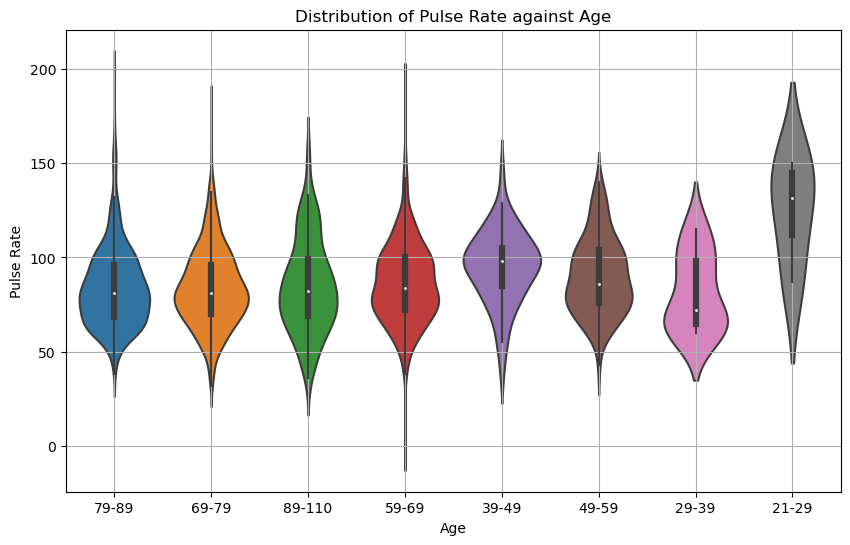

In [83]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
#no need to write plt.show everytime
%matplotlib inline
# merging Lab and demography datasets
df_agpul =Labs.merge(Demography,on='inpatient_number')
# creating a new dataframe df_agpul with only he columns inpatient_number, pulse, ageCat
df_agpul = df_agpul.loc[:,['inpatient_number','pulse','ageCat']]
df_agpul.head()
#creating violin plot to show distribution of Pulse Rate against age
plt.figure(figsize=(10, 6))
sns.violinplot(x='ageCat', y='pulse', data=df_agpul)
plt.title('Distribution of Pulse Rate against Age')
plt.xlabel('Age')
plt.ylabel('Pulse Rate')
plt.grid(True)



###  Q52. Create a Point Plot on Age against time to readmission.

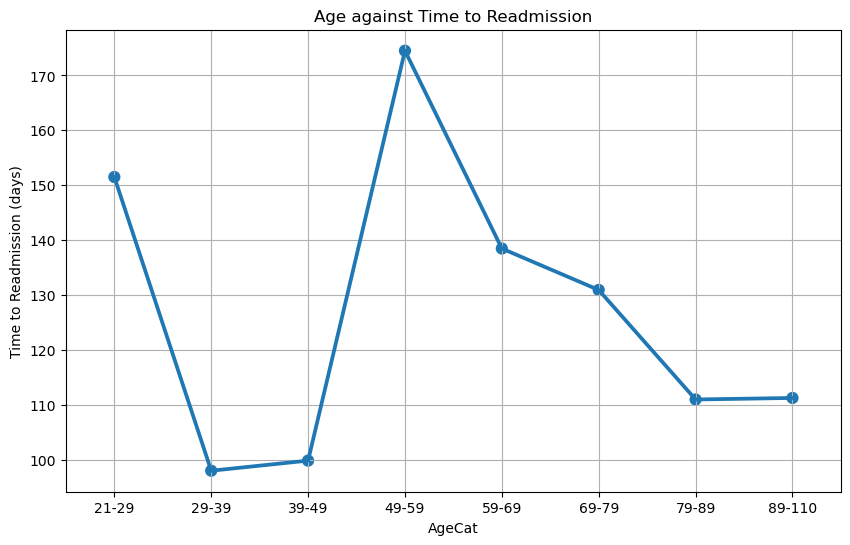

In [84]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
#no need to write plt.show everytime
%matplotlib inline
# merging Hospitalization_Discharge and demography datasets
df_agre =Hospitalization_Discharge.merge(Demography,on='inpatient_number')
# creating a new dataframe df_agre with only he columns inpatient_number, readmission_time_days_from_admission, ageCat
df_agre = df_agre.loc[:,['inpatient_number','readmission_time_days_from_admission','ageCat']]
#dropping all the null values - who are not readmitted
df_agre = df_agre.dropna()
#finding average days of readmission for each group
df_age_read = df_agre.groupby('ageCat')['readmission_time_days_from_admission'].mean().reset_index()
#creating point plot on Age_category against time to readmission
plt.figure(figsize=(10, 6))
sns.pointplot(x='ageCat', y='readmission_time_days_from_admission', data=df_age_read)
plt.title('Age against Time to Readmission')
plt.xlabel('AgeCat')
plt.ylabel('Time to Readmission (days)')
plt.grid(True)

### Q53. What is the correlation between CCI score and outcome?


In [85]:
Hospitalization_Discharge['outcome'] = Hospitalization_Discharge['outcome_during_hospitalization'].map({'Alive': 1, 'Dead': 0})
correlation = PatientHistory['CCI_score'].corr(Hospitalization_Discharge['outcome'])
correlation

-0.03463464746416423

### Q54. For all non-negative integers that are also even numbers in the array [0,1,2,6,8] print i*i

In [87]:
list1 = [0,1,2,6,8]
for i in list1:
    if i > 0 and i%2 == 0:
        print(i*i)
    else:
        print('Only even numbers')

Only even numbers
Only even numbers
4
36
64


### Q55. Create a jointplot on diastolic_blood_pressure & length of stay

C:\Users\laasya\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\laasya\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


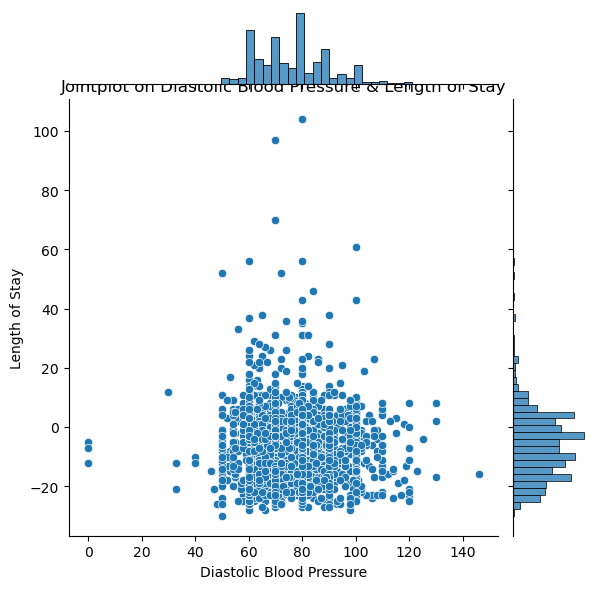

In [88]:
import seaborn as sns
import matplotlib.pyplot as plt
#warnings.filterwarnings("ignore")
#  New_df is the merged DataFrame
New_df=Hospitalization_Discharge.merge(Labs)
New_df.replace([np.inf, -np.inf], np.nan, inplace=True)
# Calculate length of stay
New_df['length_of_stay'] = New_df['dischargeDay'] - New_df['Admission_date'].dt.day
# plotting the jointplot
sns.jointplot(data=New_df, x='diastolic_blood_pressure', y='length_of_stay')
plt.title('Jointplot on Diastolic Blood Pressure & Length of Stay')
plt.xlabel('Diastolic Blood Pressure')
plt.ylabel('Length of Stay')
plt.show()

### Q56. Using loc, retrieve the agegroup and weight between indices 101 and 201.

In [90]:
#Kalyani
df7=Demography.loc[101:201, ['weight','ageCat']]
df7

weight  ageCat
101    41.0   69-79
102    64.0   79-89
103    61.0   79-89
104    40.0   79-89
105    73.0   69-79
..      ...     ...
197    50.0   79-89
198    50.0  89-110
199    50.0   69-79
200    63.0   59-69
201    60.0   69-79

[101 rows x 2 columns]

### Q57 Create a pivot table show shows outcome type as rows, the admission_ward as columns and counts of patients in each category as values

In [91]:
pivot_table = pd.pivot_table(Hospitalization_Discharge,index=['outcome_during_hospitalization'],columns=['admission_ward'],aggfunc='size')
pivot_table

admission_ward                  Cardiology  GeneralWard  ICU  Others
outcome_during_hospitalization                                      
Alive                                 1472          238   12     168
Dead                                     8            1    1       1
DischargeAgainstOrder                   67           26    2      12

### Q58 Use Hexagonal binning to show the density of patients who were readmitted when compared to Discharge Days

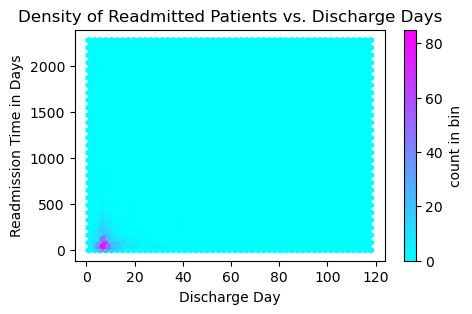

In [92]:
#Hexagon
import matplotlib.pyplot as plt
# Considering the data from Hospital_Discharge
plt.figure(figsize=(5, 3))
#Hexbin plot using Seaborn
plt.hexbin(Hospitalization_Discharge['dischargeDay'], Hospitalization_Discharge['readmission_time_days_from_admission'], gridsize=50, cmap='cool')
plt.colorbar(label='count in bin')
# giving label names to x-axis and y-axis
plt.xlabel('Discharge Day')
plt.ylabel('Readmission Time in Days')
# giving title for the chart
plt.title('Density of Readmitted Patients vs. Discharge Days')
plt.show()

### Q59 Using Sunburst chart display patients Age group, occupation and BMI Group

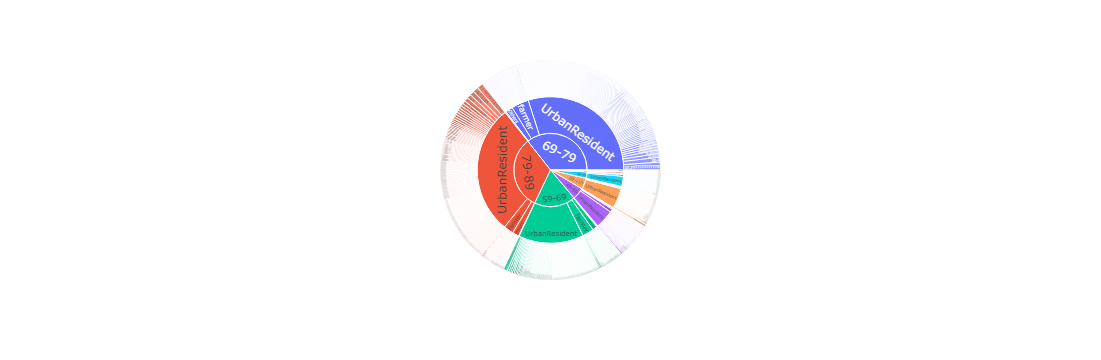

In [93]:
import plotly.express as px
Demography_new=Demography.dropna()
fig = px.sunburst(Demography_new, path=['ageCat', 'occupation', 'BMI'])
fig.show()

###  Q60 Plot the Density Chart for visit times¶

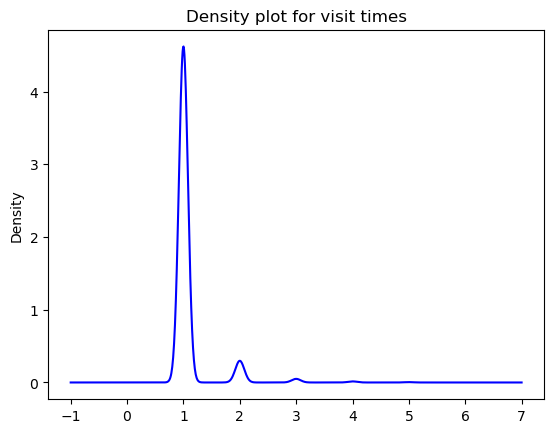

In [94]:
Hospitalization_Discharge.visit_times.plot.density(color='blue')
plt.title('Density plot for visit times')
plt.show()

### Q61 Find the array slicing to get the elements with values 11,12,16,17.

In [95]:
#creating an array
array1=np.arange(1,31).reshape(6,5)
#print(array1)
#slicing the 11,12,16,17th elements from the array using where
slice=np.where(np.isin(array1,[11,12,16,17]))
#printing the slice
print(array1[slice])

[11 12 16 17]


###  Q62 What % of all patients with an outcome of "Alive" died within 28 days. What was the mean platelet volume among this group?

In [96]:
#percentage of patients who are alive and dead within 28 days
patients_alive_dead_within_28_days_mean_platelet_volume = pd.merge(Hospitalization_Discharge,Labs,on = 'inpatient_number')
patients_alive_dead_within_28_days_mean_platelet_volume
patients_alive_and_died_within_28days = patients_alive_dead_within_28_days_mean_platelet_volume .loc[(patients_alive_dead_within_28_days_mean_platelet_volume['outcome_during_hospitalization'] == 'Alive') & (patients_alive_dead_within_28_days_mean_platelet_volume['death_within_28_days'] == 1)]
count_of_patients_alive_and_died_within_28days = len(patients_alive_and_died_within_28days)
count_of_patients_alive_and_died_within_28days
count_of_total_patients = len(Hospitalization_Discharge)
count_of_total_patients
percentage_of_patients_alive_and_dead_within_28days = (count_of_patients_alive_and_died_within_28days/count_of_total_patients)*100
percentage_of_patients_alive_and_dead_within_28days
print('percentage_of_patients_alive_and_dead_within_28days:',percentage_of_patients_alive_and_dead_within_28days)
#Finding mean platelet value among the group
patients_alive_dead_within_28_days_mean_platelet_volume [['inpatient_number','outcome_during_hospitalization', 'mean_platelet_volume']]
print('Mean platelet value among patients alive and dead withinn 28 days:\n',patients_alive_and_died_within_28days['mean_platelet_volume'])



percentage_of_patients_alive_and_dead_within_28days: 0.398406374501992
Mean platelet value among patients alive and dead withinn 28 days:
 43      12.4
74      14.3
94      11.9
140     12.8
398     13.4
505     10.4
569     11.3
1339    14.3
Name: mean_platelet_volume, dtype: float64


### Q63 find the patients who have 'h' in their DestinationDischarge and print them


In [97]:
data=Hospitalization_Discharge[Hospitalization_Discharge['DestinationDischarge'].str.contains('h',na=False)]
print(data[['inpatient_number','DestinationDischarge']])

      inpatient_number DestinationDischarge
7               787530   HealthcareFacility
18              820101   HealthcareFacility
22              868777   HealthcareFacility
29              861240   HealthcareFacility
31              814480   HealthcareFacility
...                ...                  ...
2001            726701   HealthcareFacility
2002            754589   HealthcareFacility
2003            740689   HealthcareFacility
2004            734280   HealthcareFacility
2005            781004   HealthcareFacility

[438 rows x 2 columns]


### Q64 Create a grouped bar chart that shows number of patients by gender and ageCat

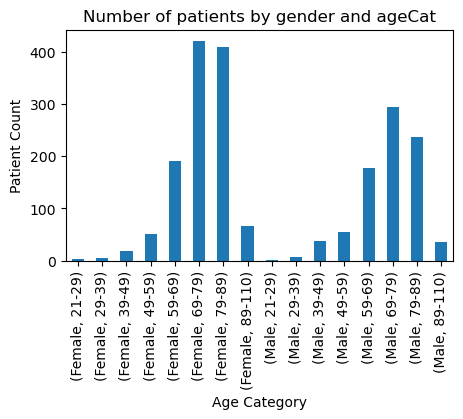

In [98]:
data=Demography.groupby(['gender','ageCat']).size()
data.plot(kind='bar',figsize=(5,3))
plt.title("Number of patients by gender and ageCat")
plt.xlabel('Age Category')
plt.ylabel('Patient Count')
plt.show()

### 65.Which Admission Ward has maximum number of visits scheduled?

In [99]:
#grouping based on wards category and then adding the visit times. Then rearranging the index values
vst_adm_ward=Hospitalization_Discharge.groupby('admission_ward')['visit_times'].sum().reset_index()

# sorting in desending order
max_vst= vst_adm_ward.sort_values('visit_times', ascending=False)
max_vst

# Printing the top value
print('Maximum number of visits scheduled in :',max_vst.loc[0,'admission_ward'],'ward')

Maximum number of visits scheduled in : Cardiology ward


### 66.Display total count of patients in each discharge_department based on gender

In [100]:
#total countof patients in each discharge_department based on gender
hospitalization_discharge_patient_prescriptions=pd.merge(Hospitalization_Discharge, Demography, on='inpatient_number')
hospitalization_discharge_patient_prescriptions
patients_in_discharge_department_based_on_gender=hospitalization_discharge_patient_prescriptions.groupby(["discharge_department","gender"], sort=False)["inpatient_number"].count()
patients_in_discharge_department_based_on_gender
count_of_patients=len(patients_in_discharge_department_based_on_gender)
count_of_patients
print('Total count of patients in each discharge_department based on gender:',count_of_patients)

Total count of patients in each discharge_department based on gender: 8


### 67.How many Unique patients were precribed each type of medication?


In [101]:
unique_patient_count=Patient_Prescriptions['inpatient_number'].unique()
unique_patient_count
patient_count_for_each_medication_type=len(unique_patient_count)
print('Unique patients who were precribed each type of medication:',patient_count_for_each_medication_type)

Unique patients who were precribed each type of medication: 2009


### 68.Find 5 patients with the highest Discharge days greater than 20. List their most common outcome

In [102]:
#patients with the highest discharge days > 20
filtered_Hospitalization_Discharge = Hospitalization_Discharge[Hospitalization_Discharge['dischargeDay'] > 20]
highest_dischargedays_patients= filtered_Hospitalization_Discharge.groupby('inpatient_number')['dischargeDay'].max()
Max_daycount=highest_dischargedays_patients.nlargest(5)
for inpatient_number, Max_discharge_days in Max_daycount.items():
    patient_data = filtered_Hospitalization_Discharge[filtered_Hospitalization_Discharge['inpatient_number'] == inpatient_number]
    most_common_outcome = patient_data['outcome_during_hospitalization'].mode().iloc[0]
print(f"inpatient: {inpatient_number}, MaximumDisDays: {Max_daycount}, Most Common Outcome: {most_common_outcome}")

inpatient: 757711, MaximumDisDays: inpatient_number
794077    123
768711    118
791880     88
794784     82
757711     76
Name: dischargeDay, dtype: int64, Most Common Outcome: Alive


### 69.Get the list of patient ID's which are not there in prescriptions but in demographics.

In [103]:
# finding the patient ID's using set difference between demographics and Prescription datasets
no_pres = set(Demography['inpatient_number']) - set(Patient_Prescriptions['inpatient_number'])
print('List of patient IDs which are not there in prescriptions but in demographics are:',no_pres)

List of patient IDs which are not there in prescriptions but in demographics are: {789308}


### 70. On average, what is the most frequent weekday of admission?

In [104]:
#extracting the days of the week from date variable
Hospitalization_Discharge['weekday']=Hospitalization_Discharge['Admission_date'].dt.dayofweek

#counting the no of entries for each days
freq_dy= Hospitalization_Discharge.weekday.value_counts(dropna=False).reset_index()

#sorting the entries count in desending order
max_cnt= freq_dy.sort_values('count', ascending=False)
max_cnt

#Mapping the corresponding days by creating a dictionary
adm_dow = {0:'Monday',
           1:'Tuesday',
           2:'Wednesday',
           3:'Thursday',
           4:'Friday',
           5:'Saturday',
           6:'Sunday'}

#using map function to map the values from dictionary
max_cnt['weekday']=max_cnt['weekday'].map(adm_dow)
max_cnt

# Printing the top value
print('Most frequent weekday of admission is:',max_cnt.loc[0,'weekday'])

Most frequent weekday of admission is: Monday


### 71.Which year had the maximum admissions?

In [105]:
Hospitalization_Discharge['Year']=Hospitalization_Discharge['Admission_date'].dt.year
adm_year=Hospitalization_Discharge.Year.value_counts(dropna=False).reset_index()
adm_year


# sorting in desending order
max_adm_year= adm_year.sort_values('count', ascending=False)
max_adm_year

# Printing the top value
print('Maximum admissions happened in the year:',max_adm_year.loc[0,'Year'])

Maximum admissions happened in the year: 2016


### 72.What % of the dataset is male vs female?

In [106]:
male_female_count = Demography['gender'].value_counts(normalize=True)*100
male_female_count

gender
Female    57.918327
Male      42.081673
Name: proportion, dtype: float64

### 73.Which patient in the youngest age category weighs the most?

In [107]:
#extracting only the rows with the '21-29' agecat, sorting and reseting the index
young=Demography[Demography['ageCat'] == '21-29'].sort_values('weight',ascending=False).reset_index()
young

# Printing the top value
print('Patient in the youngest age category who weighs the most is:',young.loc[0,'inpatient_number'])

Patient in the youngest age category who weighs the most is: 831184


### 74.Which adm ward had the lowest rate of Outcome Death?

In [108]:
death_outcome_Hospitalization_Discharge = Hospitalization_Discharge[Hospitalization_Discharge['outcome_during_hospitalization'] == 'Dead']
death_count = death_outcome_Hospitalization_Discharge.groupby('admission_ward').size().sort_values()
death_count.head(1)

admission_ward
GeneralWard    1
dtype: int64

### 75. What % of those with an outcome of death, had myocardial infarction?

In [137]:
hosp_co=pd.merge(Hospitalization_Discharge, CardiacComplications, on='inpatient_number')

hosp_co=hosp_co.loc[:,['inpatient_number','myocardial_infarction','outcome_during_hospitalization']]

patients_dead=hosp_co[hosp_co["outcome_during_hospitalization"] == 'Dead' ]

death_cnt=patients_dead.outcome_during_hospitalization.value_counts()
death_cnt

patients_myo=patients_dead[patients_dead["myocardial_infarction"] == 1 ]
patients_myo

myo_cnt=patients_myo['myocardial_infarction'].shape[0]
myo_cnt

perc = (myo_cnt/death_cnt)*100
print('The % of those with an outcome of death, had myocardial infarction is:',perc)

The % of those with an outcome of death, had myocardial infarction is: outcome_during_hospitalization
Dead    9.090909
Name: count, dtype: float64


### 76.What is the ratio of those with congestive heart failure to those who had type of heart failure Both?

In [110]:
con_heart_fail_count=CardiacComplications[CardiacComplications['congestive_heart_failure']==1].shape[0]
both_heart_fail_count=CardiacComplications[CardiacComplications['type_of_heart_failure']=="Both"].shape[0]
print("Congestive heart failure count: ",con_heart_fail_count)
print("Heart failute both count: ",both_heart_fail_count)
ratio=con_heart_fail_count/both_heart_fail_count
print("Ratio of those with congestive heart failure to those who had type of heart failure Both: ",ratio)

Congestive heart failure count:  1872
Heart failute both count:  1480
Ratio of those with congestive heart failure to those who had type of heart failure Both:  1.2648648648648648


### 77.List the number of cardiogenic shock patients based on hospitalization outcome, having a severe GCS score(higher risk of death)

In [111]:
new_merge = pd.merge(pd.merge(Hospitalization_Discharge,CardiacComplications,on = 'inpatient_number'),Responsivenes,on = 'inpatient_number')
new_merge
cardiogenic_patients_with_higher_risk_of_death = new_merge.loc[ (new_merge['Killip_grade'] == 4) & (new_merge['GCS'] <= 5) ]
cardiogenic_patients_with_higher_risk_of_death
len(cardiogenic_patients_with_higher_risk_of_death)
print('number of cardiogenic shock patients based on hospitalization outcome, having a severe GCS score:',len(cardiogenic_patients_with_higher_risk_of_death))

number of cardiogenic shock patients based on hospitalization outcome, having a severe GCS score: 10


### 78.Give the count of patients who have experinced tachicardia or bradycardia.

In [112]:
tachycardia_count = Labs[Labs['pulse'] > 100]['inpatient_number'].nunique()
bradycardia_count = Labs[Labs['pulse'] < 60]['inpatient_number'].nunique()
print(f"Number of patients with tachycardia: {tachycardia_count}")
print(f"Number of patients with bradycardia: {bradycardia_count}")

Number of patients with tachycardia: 417
Number of patients with bradycardia: 154


### 79.Create a Funnel chart of BMI Category(Normal Weight, Underweight and Obese

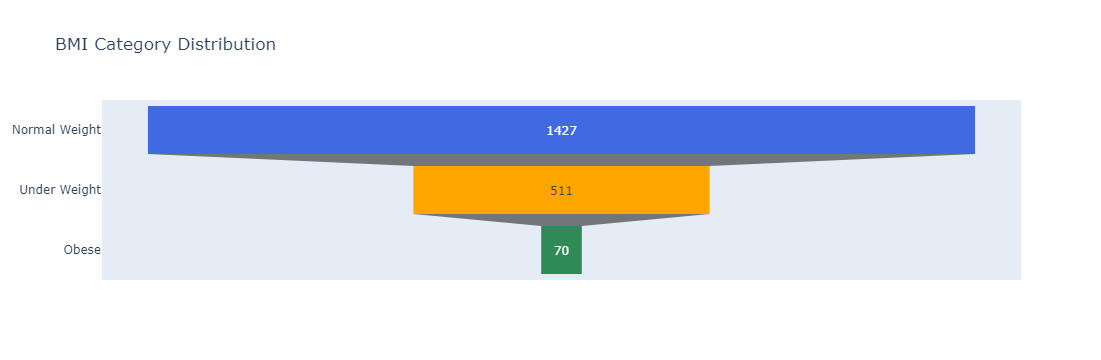

In [113]:
import plotly.graph_objects as plt
def bmi_category(bmi):
    if bmi < 18.5:
        return 'Under Weight'
    elif bmi >= 18.5 and bmi < 25:
        return 'Normal Weight'
    else:
        return 'Obese'

Demography['BMI Category'] = Demography['BMI'].apply(bmi_category)
Under_Weight = []
Normal_Weight = []
Obese = []
for BMI in Demography['BMI']:
    BMI = float(BMI) 
    if BMI < 18.5:
       Under_Weight.append(BMI)
    elif BMI < 30:
        Normal_Weight.append(BMI)
    else:
        Obese.append(BMI)
# Count occurrences of each BMI category
Under_Weight_Count = len(Under_Weight)
Normal_Weight_Count = len(Normal_Weight)
Obese_count = len(Obese)
categories = ['Normal Weight','Under Weight','Obese']
counts = [Normal_Weight_Count,Under_Weight_Count,Obese_count]

fig = plt.Figure(plt.Funnel(
    y=categories,
    x=counts,
    marker=dict(color=["royalblue", "orange", "seagreen"])
))

fig.update_layout(title="BMI Category Distribution")
fig.show()

### 80.Delete the column age from Q26 iteratively.

In [114]:
def random_age(age):
    age_range = [int(age) for age in age.split('-')]
    return np.random.randint(age_range[0], age_range[1] + 1)
Demography['new_age'] = Demography['ageCat'].apply(random_age)
average_age =Demography['new_age'].mean()
print(f"Average age of the patients: {average_age:.2f}")
for col in Demography.columns:
    if 'new_age' in col:
        del Demography['new_age']
 
Demography

Average age of the patients: 74.43


inpatient_number  gender  weight  height        BMI     occupation  \
0               857781    Male    50.0    1.64  18.590125  UrbanResident   
1               743087  Female    51.0    1.63  19.195303  UrbanResident   
2               866418    Male    70.0    1.70  24.221453         farmer   
3               775928    Male    65.0    1.70  22.491349  UrbanResident   
4               810128  Female    76.0    1.55  31.633715  UrbanResident   
...                ...     ...     ...     ...        ...            ...   
2003            740689  Female    35.0    1.50  15.555556         Others   
2004            734280  Female    50.0    1.55  20.811655  UrbanResident   
2005            781004    Male    75.0    1.70  25.951557  UrbanResident   
2006            744870    Male    40.0    1.50  17.777778  UrbanResident   
2007            791864  Female    45.0    1.55  18.730489  UrbanResident   

     ageCat   BMI Category  
0     69-79  Normal Weight  
1     69-79  Normal Weight  
2     59-69  Normal Weight  
3     69-79  Normal Weight  
4     69-79          Obese  
...     ...            ...  
2003  79-89   Under Weight  
2004  79-89  Normal Weight  
2005  39-49          Obese  
2006  49-59   Under Weight  
2007  79-89  Normal Weight  

[2008 rows x 8 columns]